# <font color = Maroon>Credit EDA Case Study</font>

### Importing the required libraries

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the useful libraries.
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

### Reading the data from csv files to Pandas dataframe

In [3]:
#Reading application data file (contains all the information of the client at the time of application)
application_data = pd.read_csv('application_data.csv')

#Reading previous application file (contains information about the client’s previous loan data)
previous_application = pd.read_csv('previous_application.csv')

In [4]:
# No of rows and columns present in both datasets
print(application_data.shape)
print(previous_application.shape)

(307511, 122)
(1670214, 37)


### Application_Data

In [5]:
# Top rows of application_data
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#Data types of each column in application_data
application_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [7]:
# Column names in application_data
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [8]:
# printing the numerical analysis for columns in application data
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


- The dataframe application_data have 122 columns but it is not necessary that we will need all the columns in the dataset for our analysis. We need to clean the data first using below steps :
1. Find the missing values in the data and treat them
2. Find outliers if any and take action accordingly to treat them

## Missing values of application data

In [9]:
# Finding the percentage of missing values in application_data dataframe and printing it in descending order
# so that the columns with the most number of missing values come at the top
appl_missing = application_data.count()/len(application_data)
appl_missing = (1-appl_missing)*100
appl_missing.sort_values(ascending = False).head(60)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

- Here we can see that there are many columns which have more than 50% of missing valuesand these are the columns which are the mode median or average of apartment size, living area floor size and so on.
Since the percentage of missing values is so large, it would not be possible to analyze these columns even after treating them or imputing them.
Hence, we can drop these columns from our dataset.

In [10]:
application_data.drop(["COMMONAREA_MEDI",
"COMMONAREA_AVG",
"COMMONAREA_MODE",
"NONLIVINGAPARTMENTS_MODE",
"NONLIVINGAPARTMENTS_MEDI",
"NONLIVINGAPARTMENTS_AVG",
"FONDKAPREMONT_MODE",
"LIVINGAPARTMENTS_MEDI",
"LIVINGAPARTMENTS_MODE",
"LIVINGAPARTMENTS_AVG",
"FLOORSMIN_MEDI",
"FLOORSMIN_MODE",
"FLOORSMIN_AVG",
"YEARS_BUILD_MEDI",
"YEARS_BUILD_AVG",
"YEARS_BUILD_MODE",
"OWN_CAR_AGE",
"LANDAREA_MODE",
"LANDAREA_AVG",
"LANDAREA_MEDI",
"BASEMENTAREA_MEDI",
"BASEMENTAREA_AVG",
"BASEMENTAREA_MODE",
"EXT_SOURCE_3",
"EXT_SOURCE_1",                       
"NONLIVINGAREA_MEDI",
"NONLIVINGAREA_AVG",
"NONLIVINGAREA_MODE",
"ELEVATORS_MODE",
"ELEVATORS_AVG",
"ELEVATORS_MEDI",
"WALLSMATERIAL_MODE",
"APARTMENTS_MODE",
"APARTMENTS_AVG",
"APARTMENTS_MEDI",
"ENTRANCES_MEDI",
"ENTRANCES_MODE",
"ENTRANCES_AVG",
"LIVINGAREA_MEDI",
"LIVINGAREA_MODE",
"LIVINGAREA_AVG",
"HOUSETYPE_MODE",
"FLOORSMAX_MODE",
"FLOORSMAX_MEDI",
"FLOORSMAX_AVG",
"YEARS_BEGINEXPLUATATION_MEDI",
"YEARS_BEGINEXPLUATATION_AVG",
"YEARS_BEGINEXPLUATATION_MODE",
"TOTALAREA_MODE",
"EMERGENCYSTATE_MODE"
], axis = 1,inplace = True)

- Now there are columns in the dataset which does not have a direct relationship with our analysis for identifying patterns which leads to a client defaulting a loan so we will be dropping these unwanted columns

In [21]:
application_data.drop(['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY',
                     'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
                     'DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','FLAG_EMAIL','FLAG_PHONE','FLAG_CONT_MOBILE',
                     'FLAG_WORK_PHONE','FLAG_EMP_PHONE','FLAG_MOBIL','DAYS_ID_PUBLISH','DAYS_REGISTRATION','REGION_POPULATION_RELATIVE','LIVE_REGION_NOT_WORK_REGION',
                     'REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','REG_REGION_NOT_WORK_REGION','REG_REGION_NOT_LIVE_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY',
                      'LIVE_CITY_NOT_WORK_CITY',"FLAG_DOCUMENT_2",'EXT_SOURCE_2',
                     "FLAG_DOCUMENT_3",
                      "FLAG_DOCUMENT_4",
                      "FLAG_DOCUMENT_5",
                      "FLAG_DOCUMENT_6",
                      "FLAG_DOCUMENT_7",
                      "FLAG_DOCUMENT_8",
                      "FLAG_DOCUMENT_9",
                      "FLAG_DOCUMENT_10",
                      "FLAG_DOCUMENT_11",
                      "FLAG_DOCUMENT_12",
                      "FLAG_DOCUMENT_13",
                      "FLAG_DOCUMENT_14",
                      "FLAG_DOCUMENT_15",
                      "FLAG_DOCUMENT_16",
                      "FLAG_DOCUMENT_17",
                      "FLAG_DOCUMENT_18",
                      "FLAG_DOCUMENT_19",
                      "FLAG_DOCUMENT_20",
                      "FLAG_DOCUMENT_21"],axis=1,inplace=True)

KeyError: "['AMT_REQ_CREDIT_BUREAU_YEAR' 'AMT_REQ_CREDIT_BUREAU_MON'\n 'AMT_REQ_CREDIT_BUREAU_WEEK' 'AMT_REQ_CREDIT_BUREAU_DAY'\n 'AMT_REQ_CREDIT_BUREAU_HOUR' 'AMT_REQ_CREDIT_BUREAU_QRT'\n 'OBS_30_CNT_SOCIAL_CIRCLE' 'OBS_60_CNT_SOCIAL_CIRCLE'\n 'DEF_30_CNT_SOCIAL_CIRCLE' 'DEF_60_CNT_SOCIAL_CIRCLE'\n 'DAYS_LAST_PHONE_CHANGE' 'FLAG_EMAIL' 'FLAG_PHONE' 'FLAG_CONT_MOBILE'\n 'FLAG_WORK_PHONE' 'FLAG_EMP_PHONE' 'FLAG_MOBIL' 'DAYS_ID_PUBLISH'\n 'DAYS_REGISTRATION' 'REGION_POPULATION_RELATIVE'\n 'LIVE_REGION_NOT_WORK_REGION' 'REGION_RATING_CLIENT_W_CITY'\n 'WEEKDAY_APPR_PROCESS_START' 'HOUR_APPR_PROCESS_START'\n 'REG_REGION_NOT_WORK_REGION' 'REG_REGION_NOT_LIVE_REGION'\n 'REG_CITY_NOT_LIVE_CITY' 'REG_CITY_NOT_WORK_CITY'\n 'LIVE_CITY_NOT_WORK_CITY' 'FLAG_DOCUMENT_2' 'FLAG_DOCUMENT_3'\n 'FLAG_DOCUMENT_4' 'FLAG_DOCUMENT_5' 'FLAG_DOCUMENT_6' 'FLAG_DOCUMENT_7'\n 'FLAG_DOCUMENT_8' 'FLAG_DOCUMENT_9' 'FLAG_DOCUMENT_10' 'FLAG_DOCUMENT_11'\n 'FLAG_DOCUMENT_12' 'FLAG_DOCUMENT_13' 'FLAG_DOCUMENT_14'\n 'FLAG_DOCUMENT_15' 'FLAG_DOCUMENT_16' 'FLAG_DOCUMENT_17'\n 'FLAG_DOCUMENT_18' 'FLAG_DOCUMENT_19' 'FLAG_DOCUMENT_20'\n 'FLAG_DOCUMENT_21'] not found in axis"

In [12]:
# CHecking the percentage of missing values for the remaining columns
appl_missing = application_data.count()/application_data.shape[0]
appl_missing = (1-appl_missing)*100
appl_missing.sort_values(ascending = False)

OCCUPATION_TYPE         31.345545
NAME_TYPE_SUITE          0.420148
EXT_SOURCE_2             0.214626
AMT_GOODS_PRICE          0.090403
AMT_ANNUITY              0.003902
CNT_FAM_MEMBERS          0.000650
DAYS_BIRTH               0.000000
AMT_INCOME_TOTAL         0.000000
TARGET                   0.000000
NAME_CONTRACT_TYPE       0.000000
CODE_GENDER              0.000000
FLAG_OWN_CAR             0.000000
FLAG_OWN_REALTY          0.000000
CNT_CHILDREN             0.000000
AMT_CREDIT               0.000000
NAME_HOUSING_TYPE        0.000000
REGION_RATING_CLIENT     0.000000
DAYS_EMPLOYED            0.000000
ORGANIZATION_TYPE        0.000000
NAME_INCOME_TYPE         0.000000
NAME_EDUCATION_TYPE      0.000000
NAME_FAMILY_STATUS       0.000000
SK_ID_CURR               0.000000
dtype: float64

#### OCCUPATION_TYPE

In [13]:
#checking the number of null values in OCCUPATION_TYPE
application_data.OCCUPATION_TYPE.isnull().sum()

96391

In [14]:
# checking the type of occupation_type in the application_data dataset
application_data.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

- Since the percentage of missing values is greater than 30%, hence it will not be advisable to replace the missing values with mode for this categorical value.
Hence we will be replacing the null values with a new category

In [15]:
application_data["OCCUPATION_TYPE"].fillna("Unknown",inplace = True)

# checking the number of null values in OCCUPATION_TYPE again
application_data.OCCUPATION_TYPE.isnull().sum()

0

#### NAME_TYPE_SUITE

In [16]:
#checking the number of null values in NAME_TYPE_SUITE
application_data.NAME_TYPE_SUITE.isnull().sum()

1292

In [17]:
application_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

- Since the variable NAME_TYPE_SUITE is a categorical variable and the null value percentage is very less. Hence we can replace the null values for this column with the mode i.e. Unaccompanied

In [18]:
application_data.NAME_TYPE_SUITE.fillna("Unaccompanied",inplace = True)

In [19]:
application_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

#### AMT_GOODS_PRICE

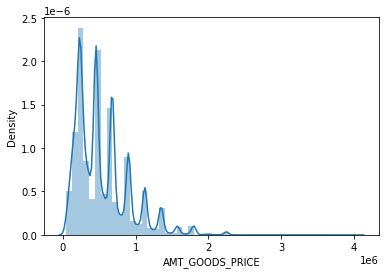

In [20]:
sns.distplot(application_data.AMT_GOODS_PRICE)
plt.show()

- Since here also the data is skewed (right skewed), hence we will be replacing the null values with median

In [22]:
application_data.AMT_GOODS_PRICE.fillna(application_data.AMT_GOODS_PRICE.median(),inplace = True)

#### AMT_ANNUITY

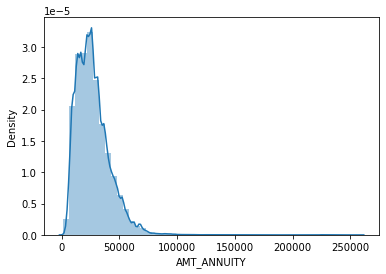

In [23]:
sns.distplot(application_data.AMT_ANNUITY)
plt.show()

- Since here also the data is skewed (right skewed), hence we will be replacing the null values with median

In [24]:
application_data.AMT_ANNUITY.fillna(application_data.AMT_ANNUITY.median(),inplace = True)

In [25]:
# checking the count of null values in AMT_ANNUITY after replacing the values
application_data.AMT_ANNUITY.isnull().sum()

0

#### CNT_FAM_MEMBERS

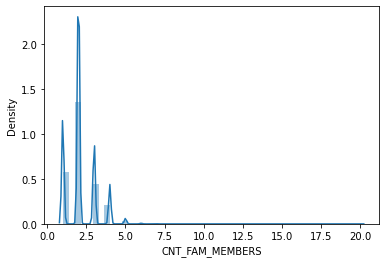

In [26]:
sns.distplot(application_data.CNT_FAM_MEMBERS)
plt.show()

- Since here also the data is skewed (right skewed), hence we will be replacing the null values with median

In [27]:
application_data.CNT_FAM_MEMBERS.fillna(application_data.CNT_FAM_MEMBERS.median(),inplace = True)

In [28]:
application_data.CNT_FAM_MEMBERS.value_counts()

2.0     158359
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [29]:
# checking the null values in application_data dataset after treating all the missing values
application_data.isnull().sum().sum()

660

#### DAYS_EMPLOYED and DAYS_BIRTH

In [30]:
application_data.DAYS_EMPLOYED.head(20)

0       -637
1      -1188
2       -225
3      -3039
4      -3038
5      -1588
6      -3130
7       -449
8     365243
9      -2019
10      -679
11    365243
12     -2717
13     -3028
14      -203
15     -1157
16     -1317
17      -191
18     -7804
19     -2038
Name: DAYS_EMPLOYED, dtype: int64

In [31]:
application_data.DAYS_BIRTH.head(20)

0     -9461
1    -16765
2    -19046
3    -19005
4    -19932
5    -16941
6    -13778
7    -18850
8    -20099
9    -14469
10   -10197
11   -20417
12   -13439
13   -14086
14   -14583
15    -8728
16   -12931
17    -9776
18   -17718
19   -11348
Name: DAYS_BIRTH, dtype: int64

- In application_data dataset, we have two columns Days_Employed and Days_Birth which are have negative numbers. We have to correct these columns by using abs function to make the DAYS_BIRTH and DAYS_EMPLOYED positive

In [32]:
application_data.DAYS_BIRTH = abs(application_data.DAYS_BIRTH)
application_data.DAYS_EMPLOYED = abs(application_data.DAYS_EMPLOYED)

- These two columns cannot give any insights currently but these columns can be used to calculate the age of the client(AGE) and years of experience of client(Employed_years) by converting DAYS_EMPLOYED and DAYS_BIRTH to years

In [33]:
application_data['AGE'] = round(application_data['DAYS_BIRTH'].apply(lambda x:x/365),2)
application_data['Employed_years'] = round(application_data['DAYS_EMPLOYED'].apply(lambda x:x/365),2)

In [34]:
# checking the top rows of application_data dataset
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,ORGANIZATION_TYPE,EXT_SOURCE_2,AGE,Employed_years
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,House / apartment,9461,637,Laborers,1.0,2,Business Entity Type 3,0.262949,25.92,1.75
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,House / apartment,16765,1188,Core staff,2.0,1,School,0.622246,45.93,3.25
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,House / apartment,19046,225,Laborers,1.0,2,Government,0.555912,52.18,0.62
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,House / apartment,19005,3039,Laborers,2.0,2,Business Entity Type 3,0.650442,52.07,8.33
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,House / apartment,19932,3038,Core staff,1.0,2,Religion,0.322738,54.61,8.32


## Data Quality and Outlier Detection of application_data

In [35]:
# printing the column names of dataset application_data
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'ORGANIZATION_TYPE',
       'EXT_SOURCE_2', 'AGE', 'Employed_years'],
      dtype='object')

#### TARGET

In [36]:
# checking the values of TARGET variable so that no outliers or incorrect values are present
application_data.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

#### NAME_CONTRACT_TYPE

In [37]:
# checking the values of NAME_CONTRACT_TYPE variable so that no outliers or incorrect values are present
application_data.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

#### CODE_GENDER

In [38]:
# checking the values of CODE_GENDER variable so that no outliers or incorrect values are present
application_data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

- The CODE_GENDER columns contains some data with value XNA which is incorrect. These values can be replaced by the mode of the column, which is 'F' in this case

In [39]:
application_data['CODE_GENDER'] = application_data['CODE_GENDER'].apply(lambda x : 'F' if x == 'XNA' else x)

In [40]:
# checking the values of CODE_GENDER variable after replacing XNA values
application_data.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

#### FLAG_OWN_CAR

In [41]:
# checking the values of FLAG_OWN_CAR variable so that no outliers or incorrect values are present
application_data.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

#### FLAG_OWN_REALTY

In [42]:
# checking the values of FLAG_OWN_REALTY variable so that no outliers or incorrect values are present
application_data.FLAG_OWN_REALTY.value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

#### CNT_CHILDREN

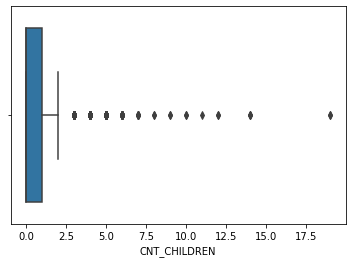

In [43]:
# plotting values in CNT_CHILDREN in a box plot to find out the outliers
sns.boxplot(application_data.CNT_CHILDREN)
plt.show()

In [44]:
# checking the values of CNT_CHILDREN variable and the percentage of each value
application_data.CNT_CHILDREN.value_counts(normalize=True)*100

0     70.036844
1     19.875387
2      8.698551
3      1.208737
4      0.139507
5      0.027316
6      0.006829
7      0.002276
14     0.000976
19     0.000650
12     0.000650
10     0.000650
9      0.000650
8      0.000650
11     0.000325
Name: CNT_CHILDREN, dtype: float64

- There are outliers present in the column CNT_CHILDREN which only comprise of very small percentage of the whole data. As maximum number applicant's have 0,1 or 2 children, the records with outliers can be removed from the dataset

In [45]:
application_data = application_data[~(application_data['CNT_CHILDREN']>2)]

In [46]:
# checking the shape of the dataset after removing the rows with CNT_CHILDREN more than 2
application_data.shape

(303239, 25)

#### NAME_TYPE_SUITE

In [47]:
# checking the values of NAME_TYPE_SUITE variable so that no outliers or incorrect values are present
application_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      246454
Family              39561
Spouse, partner     11144
Children             3215
Other_B              1741
Other_A               856
Group of people       268
Name: NAME_TYPE_SUITE, dtype: int64

#### NAME_INCOME_TYPE

In [48]:
# checking the values of NAME_INCOME_TYPE variable so that no outliers or incorrect values are present
application_data.NAME_INCOME_TYPE.value_counts()

Working                 155918
Commercial associate     70735
Pensioner                55253
State servant            21278
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

#### NAME_EDUCATION_TYPE

In [49]:
# checking the values of NAME_EDUCATION_TYPE variable so that no outliers or incorrect values are present
application_data.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    215193
Higher education                  73962
Incomplete higher                 10177
Lower secondary                    3746
Academic degree                     161
Name: NAME_EDUCATION_TYPE, dtype: int64

#### NAME_FAMILY_STATUS

In [50]:
# checking the values of NAME_FAMILY_STATUS variable so that no outliers or incorrect values are present
application_data.NAME_FAMILY_STATUS.value_counts()

Married                 192767
Single / not married     45346
Civil marriage           29471
Separated                19632
Widow                    16021
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

- There are only 2 records in the unknown category of NAME_FAMILY_STATUS. As these number of records are very less when compared to the total dataset, we can impute the Unknown values with the mode which is 'Married' in this case.

In [51]:
application_data['NAME_FAMILY_STATUS'] = application_data['NAME_FAMILY_STATUS'].apply(lambda x: 'Married' if x=='Unknown' else x)

In [52]:
application_data.NAME_FAMILY_STATUS.value_counts()

Married                 192769
Single / not married     45346
Civil marriage           29471
Separated                19632
Widow                    16021
Name: NAME_FAMILY_STATUS, dtype: int64

#### NAME_HOUSING_TYPE

In [53]:
# checking the values of NAME_HOUSING_TYPE variable so that no outliers or incorrect values are present
application_data.NAME_HOUSING_TYPE.value_counts()

House / apartment      269034
With parents            14694
Municipal apartment     11038
Rented apartment         4812
Office apartment         2569
Co-op apartment          1092
Name: NAME_HOUSING_TYPE, dtype: int64

####  CNT_FAM_MEMBERS

In [54]:
# checking the values of CNT_FAM_MEMBERS variable so that no outliers or incorrect values are present
application_data.CNT_FAM_MEMBERS.value_counts(normalize=True)

2.0    0.522225
1.0    0.223741
3.0    0.173464
4.0    0.080570
Name: CNT_FAM_MEMBERS, dtype: float64

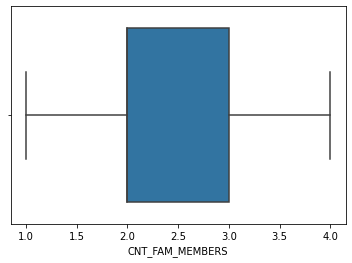

In [55]:
# plotting values in CNT_FAM_MEMBERS in a box plot to find out the outliers
sns.boxplot(application_data.CNT_FAM_MEMBERS)
plt.show()

- There are no outliers present in CNT_FAM_MEMBERS

#### ORGANIZATION_TYPE

In [56]:
# plotting values in ORGANIZATION_TYPE in a box plot to find out the outliers
application_data.ORGANIZATION_TYPE.value_counts(normalize = True)*100

Business Entity Type 3    22.110612
XNA                       18.224899
Self-employed             12.454862
Other                      5.391127
Medicine                   3.637065
Business Entity Type 2     3.427659
Government                 3.365992
School                     2.863088
Trade: type 7              2.546836
Kindergarten               2.198926
Construction               2.180458
Business Entity Type 1     1.944011
Transport: type 4          1.756041
Trade: type 3              1.138046
Industry: type 9           1.085612
Industry: type 3           1.060879
Security                   1.058241
Housing                    0.961948
Industry: type 11          0.876866
Military                   0.849495
Bank                       0.818167
Agriculture                0.777275
Police                     0.757159
Transport: type 2          0.714618
Postal                     0.695161
Security Ministries        0.639759
Trade: type 2              0.623930
Restaurant                 0

- In ORGANIZATION_TYPE column there are 18% data which have the value 'XNA'. Since the percentage of the incorrect records is less than 20%, in these cases we could replace the XNA values with the mode. But since these records are the second highest number of records in a category, replacing it with mode can give incorrect insights so we will create a new category 'Unknown' for the ORGANIZATION_TYPE and replace the XNA values with that

In [57]:
application_data['ORGANIZATION_TYPE'] = application_data['ORGANIZATION_TYPE'].apply(lambda x: 'Unknown' if x=='XNA' else x)

In [58]:
# checking the values in ORGANIZATION TYPE after replacing the XNA values
application_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67048
Unknown                   55265
Self-employed             37768
Other                     16348
Medicine                  11029
Business Entity Type 2    10394
Government                10207
School                     8682
Trade: type 7              7723
Kindergarten               6668
Construction               6612
Business Entity Type 1     5895
Transport: type 4          5325
Trade: type 3              3451
Industry: type 9           3292
Industry: type 3           3217
Security                   3209
Housing                    2917
Industry: type 11          2659
Military                   2576
Bank                       2481
Agriculture                2357
Police                     2296
Transport: type 2          2167
Postal                     2108
Security Ministries        1940
Trade: type 2              1892
Restaurant                 1782
Services                   1564
University                 1305
Industry: type 7           1294
Transpor

#### AGE

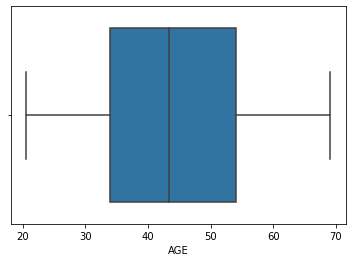

In [59]:
# plotting the values of AGE column in a box plot to find the outliers if any
sns.boxplot(application_data.AGE)
plt.show()

#### Employed_years

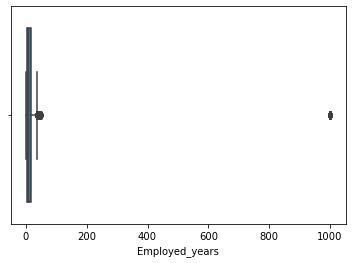

In [60]:
# plotting the values of Employed_years column in a box plot to find the outliers if any
sns.boxplot(application_data.Employed_years)
plt.show()

- The column Employed_years have outliers which are incorrect according to the business scenario. It is not possible for anyone to have 1000 years experience so for this dataset, we can remove the records with Employed_years greater than 100

In [61]:
application_data = application_data[~(application_data['Employed_years']>100)]

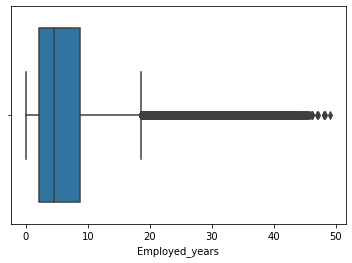

In [62]:
# Checking the outliers if any in Employed_years after removing the records with values greater than 100
sns.boxplot(application_data.Employed_years)
plt.show()

In [63]:
application_data.Employed_years[application_data.Employed_years > 20].sum()

330059.97000000003

- There are still some outliers present in the column Employed_years, these values can be binned into different categories so that we can still use them and get some insights from the Employed years between 20 to 50

In [64]:
application_data.Employed_years.value_counts()

0.55     539
0.59     512
0.61     507
0.53     504
0.58     487
        ... 
39.46      1
31.53      1
34.77      1
37.00      1
41.85      1
Name: Employed_years, Length: 4054, dtype: int64

In [65]:
application_data.Employed_years.max()

49.07

In [66]:
#Binning the values of Employed_years
dbins = [0,5,10,15,20,25,30,35,40,45,50]
dlabel = ['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40',
       '40-45','45 and above']
application_data['Employed_years'] = pd.cut(application_data.Employed_years,bins = dbins,labels = dlabel)

In [67]:
application_data.Employed_years.value_counts()

0-5             134223
5-10             63601
10-15            27014
15-20            10666
20-25             6169
25-30             3298
30-35             1937
35-40              829
40-45              210
45 and above        24
Name: Employed_years, dtype: int64

#### AMT_GOODS_PRICE

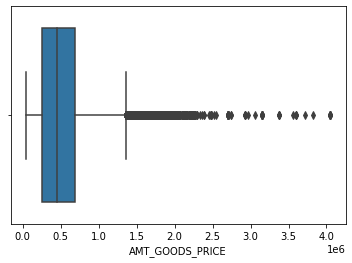

In [68]:
# plotting values of AMT_GOODS_PRICE in a box plot to find the outliers
sns.boxplot(application_data.AMT_GOODS_PRICE)
plt.show()

- There are outliers present in AMT_Goods_PRICE. The below line of code will find the Upper fence of the box plot or the maximum value so that the records greater than the missing values can be removed

In [69]:
q1 = application_data['AMT_GOODS_PRICE'].quantile(0.25)
q3 = application_data['AMT_GOODS_PRICE'].quantile(0.75)
IQR = q3 - q1
Upper_fence = q3 + (1.5 * IQR)
print(Upper_fence)

1361250.0


In [70]:
# percentage of records with AMT_GOODS_PRICE > 1361250 with respect to total records of AMT_GOOD_PRICE
((application_data['AMT_GOODS_PRICE']>1361250).sum()/application_data['AMT_GOODS_PRICE'].shape[0])*100

2.95111584278997

- These outliers are very small in numbers with respect to the whole dataset so these records with the outliers could be removed.

In [71]:
application_data = application_data[~(application_data['AMT_GOODS_PRICE']>1361250)]

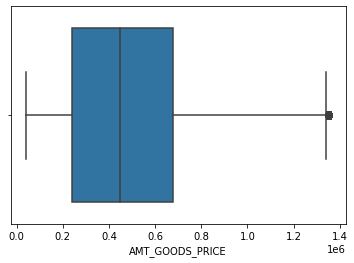

In [72]:
# plotting box plot for AMT_GOODS_PRICE after removing the outliers
sns.boxplot(application_data.AMT_GOODS_PRICE)
plt.show()

#### AMT_ANNUITY

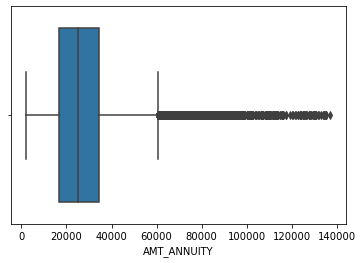

In [73]:
# plotting values of AMT_ANNUITY in a box plot to find the outliers
sns.boxplot(application_data.AMT_ANNUITY)
plt.show()

- There are outliers present in AMT_ANNUITY. The below line of code will find the Upper fence of the box plot or the maximum value so that the records greater than the missing values can be removed

In [74]:
q1 = application_data['AMT_ANNUITY'].quantile(0.25)
q3 = application_data['AMT_ANNUITY'].quantile(0.75)
IQR = q3 - q1
Upper_fence = q3 + (1.5 * IQR)
print(Upper_fence)

60570.0


In [75]:
# percentage of records with AMT_ANNUITY > 60570 with respect to total records of AMT_ANNUITY
((application_data['AMT_ANNUITY']>60570).sum()/application_data['AMT_ANNUITY'].shape[0])*100

1.7630975334086827

- These outliers are very small in numbers with respect to the whole dataset so these records with the outliers could be removed.

In [76]:
application_data = application_data[~(application_data['AMT_ANNUITY']>60570)]

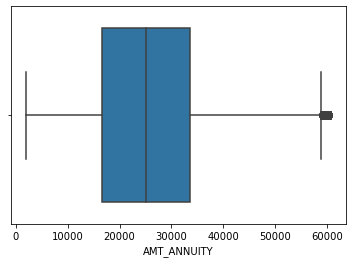

In [77]:
# plotting box plot for AMT_ANNUITY after removing the outliers
sns.boxplot(application_data.AMT_ANNUITY)
plt.show()

#### AMT_CREDIT

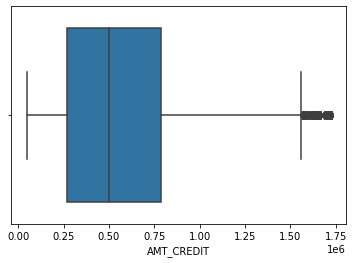

In [78]:
# plotting values of AMT_CREDIT in a box plot to find the outliers
sns.boxplot(application_data.AMT_CREDIT)
plt.show()

- There are outliers present in AMT_CREDIT. The below line of code will find the Upper fence of the box plot or the maximum value so that the records greater than the missing values can be removed

In [79]:
q1 = application_data['AMT_CREDIT'].quantile(0.25)
q3 = application_data['AMT_CREDIT'].quantile(0.75)
IQR = q3 - q1
Upper_fence = q3 + (1.5 * IQR)
print(Upper_fence)

1562827.5


In [80]:
# percentage of records with AMT_CREDIT > 1562827.5 with respect to total records of AMT_CREDIT
((application_data['AMT_CREDIT']>1562827.5).sum()/application_data['AMT_CREDIT'].shape[0])*100

0.20388049726537882

- These outliers are very small in numbers with respect to the whole dataset so these records with the outliers could be removed.

In [81]:
application_data = application_data[~(application_data['AMT_CREDIT']>1562827.5)]

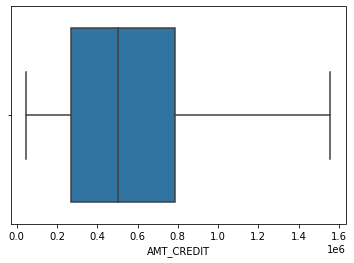

In [82]:
# plotting values of AMT_CREDIT in a box plot after removing outliers
sns.boxplot(application_data.AMT_CREDIT)
plt.show()

#### REGION_RATING_CLIENT

In [83]:
# checking the values of NAME_HOUSING_TYPE variable so that no outliers or incorrect values are present
application_data.REGION_RATING_CLIENT.value_counts()

2    175044
3     36832
1     24055
Name: REGION_RATING_CLIENT, dtype: int64

### Previous_Application

In [84]:
# information of previous_application dataset
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [85]:
# Number of rows and columns in previous_application
previous_application.shape

(1670214, 37)

In [86]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Missing values in previous_application

In [87]:
# Finding the percentage of missing values in different columns in previous_application in descending order
prev_missing = previous_application.count()/previous_application.shape[0]
prev_missing = (1-prev_missing)*100
prev_missing.sort_values(ascending = False).head(60)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
RATE_DOWN_PAYMENT              53.636480
AMT_DOWN_PAYMENT               53.636480
NAME_TYPE_SUITE                49.119754
DAYS_TERMINATION               40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
AMT_APPLICATION                 0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CASH_LOAN_P

- In previous application there are many columns which have greater than 40% of missing values. Due to high amount of missing values, using these variables can result in wrong analysis of the data. Hence, these columns can be removed from the dataset.

In [88]:
previous_application.drop(["RATE_INTEREST_PRIVILEGED",
                           "RATE_INTEREST_PRIMARY",
                           "RATE_DOWN_PAYMENT",
                           "AMT_DOWN_PAYMENT",
                           "NAME_TYPE_SUITE",
                           "DAYS_TERMINATION",
                           "NFLAG_INSURED_ON_APPROVAL",
                           "DAYS_FIRST_DRAWING",
                           "DAYS_FIRST_DUE",
                           "DAYS_LAST_DUE_1ST_VERSION",
                           "DAYS_LAST_DUE"],axis = 1, inplace = True)

In [89]:
# Checking the percentage of missing values in descending order after removing the above columns
prev_missing = previous_application.count()/previous_application.shape[0]
prev_missing = (1-prev_missing)*100
prev_missing.sort_values(ascending = False).head(60)

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_CASH_LOAN_PURPOSE          0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_APPLICATION                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_YIELD_GROUP                0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDU

#### AMT_ANNUITY, AMT_GOODS_PRICE, CNT_PAYMENT, AMT_CREDIT

- Plotting distribution plot for columns AMT_ANNUITY, AMT_GOODS_PRICE, CNT_PAYMENT and AMT_CREDIT to observe the skewness in the data

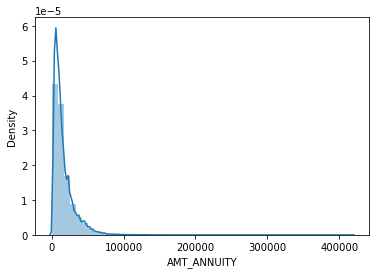

In [90]:
sns.distplot(previous_application.AMT_ANNUITY)
plt.show()

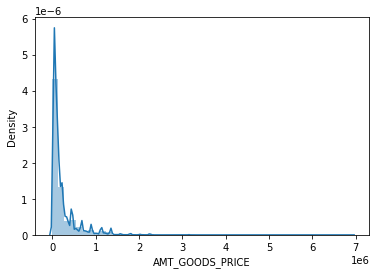

In [91]:
sns.distplot(previous_application.AMT_GOODS_PRICE)
plt.show()

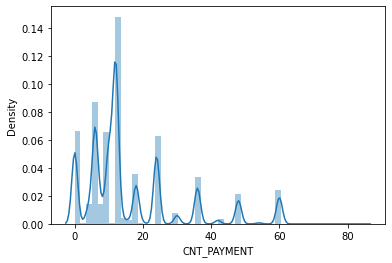

In [92]:
sns.distplot(previous_application.CNT_PAYMENT)
plt.show()

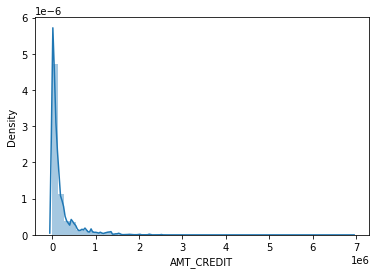

In [93]:
sns.distplot(previous_application.AMT_CREDIT)
plt.show()

- Since here also the data in the four variables AMT_ANNUITY, AMT_GOODS_PRICE, CNT_PAYMENT and AMT_CREDIT is skewed (right skewed), hence we will be replacing the null values with median

In [94]:
previous_application.AMT_GOODS_PRICE.fillna(previous_application.AMT_GOODS_PRICE.median(),inplace = True)
previous_application.AMT_ANNUITY.fillna(previous_application.AMT_ANNUITY.median(),inplace = True)
previous_application.CNT_PAYMENT.fillna(previous_application.CNT_PAYMENT.median(),inplace = True)
previous_application.AMT_CREDIT.fillna(previous_application.AMT_CREDIT.median(),inplace = True)

In [95]:
previous_application.shape

(1670214, 26)

#### PRODUCT_COMBINATION

In [96]:
# Calculating the percentage of null values in the column PRODUCT_COMBINATION
(previous_application.PRODUCT_COMBINATION.isnull().sum())/(previous_application.PRODUCT_COMBINATION.shape[0])*100

0.02071590826085759

- Since, product_combination is a categorical variable and the percentage of null values is very less as compared to the whole dataset, these null values can be replaced by mode

In [97]:
previous_application.PRODUCT_COMBINATION.fillna(previous_application.PRODUCT_COMBINATION.mode()[0],inplace = True)

In [98]:
# checking the number of null values in previous_application dataset after treating all the missing values
previous_application.isnull().sum().sum()

0

- There are some unwanted columns present in the dataset previous_application which we will not be using in the analysis so these columns can be removed

In [99]:
previous_application.drop(['WEEKDAY_APPR_PROCESS_START',
                           'HOUR_APPR_PROCESS_START',
                           'FLAG_LAST_APPL_PER_CONTRACT',
                           'NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [100]:
# checking the shape of previous_application
previous_application.shape

(1670214, 22)

In [101]:
# printing all the column names of previous_application
previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

## Data Quality and Outlier Detection of previous_application

#### NAME_CONTRACT_TYPE

In [102]:
#checking the values of column NAME_CONTRACT_TYPE in previous_application to observe the outliers or incorrect values if any
previous_application.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

- There are some 'XNA' values present in NAME_CONTRACT_TYPE which are incorrect values.

In [103]:
# Checking the percentage of XNA values with respect to the total values of NAME_CONTRACT_TYPE
(((previous_application['NAME_CONTRACT_TYPE']=='XNA').sum())/(previous_application['NAME_CONTRACT_TYPE'].shape[0]))*100

0.02071590826085759

- The percentage of values with XNA in NAME_CONTRACT_TYPE is very less with respect to the total data. These values can be replaced by the mode of the data i.e. Cash loans

In [104]:
previous_application['NAME_CONTRACT_TYPE'] = previous_application['NAME_CONTRACT_TYPE'].apply(lambda x : 'Cash loans' if x == 'XNA' else x)

In [105]:
previous_application.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747899
Consumer loans     729151
Revolving loans    193164
Name: NAME_CONTRACT_TYPE, dtype: int64

#### NAME_CASH_LOAN_PURPOSE

In [106]:
#checking the values of column NAME_CASH_LOAN_PURPOSE in previous_application to observe the outliers or incorrect values if any
previous_application.NAME_CASH_LOAN_PURPOSE.value_counts(normalize = True)*100

XAP                                 55.242083
XNA                                 40.588691
Repairs                              1.422872
Other                                0.934491
Urgent needs                         0.503648
Buying a used car                    0.172912
Building a house or an annex         0.161237
Everyday expenses                    0.144652
Medicine                             0.130163
Payments on other loans              0.115614
Education                            0.094180
Journey                              0.074182
Purchase of electronic equipment     0.063525
Buying a new car                     0.060591
Wedding / gift / holiday             0.057597
Buying a home                        0.051790
Car repairs                          0.047718
Furniture                            0.044845
Buying a holiday home / land         0.031912
Business development                 0.025506
Gasification / water supply          0.017962
Buying a garage                   

In [107]:
# calculating the count of XNA values in previous_application
previous_application.eq('XNA').sum()

SK_ID_PREV                      0
SK_ID_CURR                      0
NAME_CONTRACT_TYPE              0
AMT_ANNUITY                     0
AMT_APPLICATION                 0
AMT_CREDIT                      0
AMT_GOODS_PRICE                 0
NAME_CASH_LOAN_PURPOSE     677918
NAME_CONTRACT_STATUS            0
DAYS_DECISION                   0
NAME_PAYMENT_TYPE          627384
CODE_REJECT_REASON           5244
NAME_CLIENT_TYPE             1941
NAME_GOODS_CATEGORY        950809
NAME_PORTFOLIO             372230
NAME_PRODUCT_TYPE         1063666
CHANNEL_TYPE                    0
SELLERPLACE_AREA                0
NAME_SELLER_INDUSTRY       855720
CNT_PAYMENT                     0
NAME_YIELD_GROUP           517215
PRODUCT_COMBINATION             0
dtype: int64

In [108]:
# calculating the count of XAP values in previous_application
previous_application.eq('XAP').sum()

SK_ID_PREV                      0
SK_ID_CURR                      0
NAME_CONTRACT_TYPE              0
AMT_ANNUITY                     0
AMT_APPLICATION                 0
AMT_CREDIT                      0
AMT_GOODS_PRICE                 0
NAME_CASH_LOAN_PURPOSE     922661
NAME_CONTRACT_STATUS            0
DAYS_DECISION                   0
NAME_PAYMENT_TYPE               0
CODE_REJECT_REASON        1353093
NAME_CLIENT_TYPE                0
NAME_GOODS_CATEGORY             0
NAME_PORTFOLIO                  0
NAME_PRODUCT_TYPE               0
CHANNEL_TYPE                    0
SELLERPLACE_AREA                0
NAME_SELLER_INDUSTRY            0
CNT_PAYMENT                     0
NAME_YIELD_GROUP                0
PRODUCT_COMBINATION             0
dtype: int64

In [109]:
previous_application.NAME_CASH_LOAN_PURPOSE[
    (previous_application['NAME_CASH_LOAN_PURPOSE'] == 'XNA') | 
    (previous_application['NAME_CASH_LOAN_PURPOSE'] == 'XAP')].value_counts()

XAP    922661
XNA    677918
Name: NAME_CASH_LOAN_PURPOSE, dtype: int64

In [110]:
previous_application['NAME_CASH_LOAN_PURPOSE'].shape

(1670214,)

- The count of XAP and XNA values in NAME_CASH_LOAN_PURPOSE is very high. Carrying out the analysis with these data as it is or replacing the data with mode or median will result in incorrect analysis and the records with XAP and XNA values in NAME_CASH_LOAN_PURPOSE cannot be removed because of the huge count. So the safer option will be to not consider this column and drop it from previous_application

In [111]:
previous_application.drop(['NAME_CASH_LOAN_PURPOSE'],axis = 1, inplace = True)

#### NAME_CASH_CONTRACT_STATUS

In [112]:
#checking the values of column NAME_CONTRACT_STATUS in previous_application to observe the outliers or incorrect values if any
previous_application.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

#### DAYS_DECISION

- The column DAYS_DECISION in previous_application is having negative values. These negative values have to be converted to positive using abs() function

In [113]:
previous_application.DAYS_DECISION.head(10)

0    -73
1   -164
2   -301
3   -512
4   -781
5   -684
6    -14
7    -21
8   -386
9    -57
Name: DAYS_DECISION, dtype: int64

In [114]:
previous_application.DAYS_DECISION = abs(previous_application.DAYS_DECISION)

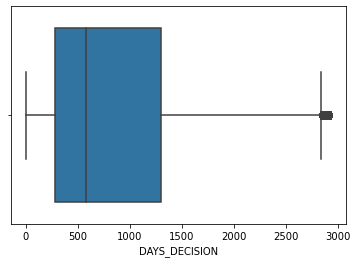

In [115]:
# plotting a bar plot for DAYS_DECISION to observe the outliers if any
sns.boxplot(previous_application.DAYS_DECISION)
plt.show()

In [116]:
q1 = previous_application.DAYS_DECISION.quantile(0.25)
q3 = previous_application.DAYS_DECISION.quantile(0.75)
IQR = q3 - q1
Upper_fence = q3 + (1.5 * IQR)
print(Upper_fence)

2830.0


- The maximum value of DAYS_DECISION is 2830 so to remove the outliers, all the records which have DAYS_DECISION greater than 2830 can be removed from previous_application

In [117]:
previous_application = previous_application[~(previous_application['DAYS_DECISION']>2830)]

#### NAME_PAYMENT_TYPE

In [118]:
#checking the values of column NAME_PAYMENT_TYPE in previous_application to observe the outliers or incorrect values if any
previous_application.NAME_PAYMENT_TYPE.value_counts(normalize = True)*100

Cash through the bank                        61.840397
XNA                                          37.608183
Non-cash from your account                    0.487341
Cashless from the account of the employer     0.064079
Name: NAME_PAYMENT_TYPE, dtype: float64

- The percentage of XNA values is very high in NAME_PAYMENT_TYPE so it is not advised to replace it with mode values or drop the rows. We can treat these XNA values as missing values and not consider it for our analysis and drop the column

In [119]:
previous_application.drop(['NAME_PAYMENT_TYPE'],axis = 1, inplace = True)

#### CODE_REJECT_REASON

In [120]:
#checking the values of column CODE_REJECT_REASON in previous_application to observe the outliers or incorrect values if any
previous_application.CODE_REJECT_REASON.value_counts(normalize = True)*100

XAP       80.930667
HC        10.583592
LIMIT      3.369149
SCO        2.187042
CLIENT     1.599620
SCOFR      0.775183
XNA        0.315616
VERIF      0.209664
SYSTEM     0.029468
Name: CODE_REJECT_REASON, dtype: float64

- The percentage of XAP and XNA values is very high in CODE_REJECT_REASON so it is not advised to replace it with mode values or drop the rows. We can treat these XNA values as missing values and not consider it for our analysis and drop the column

In [121]:
previous_application.drop(['CODE_REJECT_REASON'],axis = 1, inplace = True)

#### NAME_CLIENT_TYPE

In [122]:
#checking the values of column NAME_CLIENT_TYPE in previous_application to observe the outliers or incorrect values if any
previous_application.NAME_CLIENT_TYPE.value_counts(normalize = True)*100

Repeater     73.902047
New          17.776555
Refreshed     8.203950
XNA           0.117448
Name: NAME_CLIENT_TYPE, dtype: float64

- The percentage of count of XNA values is very less as compared to the whole data so these XNA values can be replaced by mode which is 'Repeater' in this case.

In [123]:
previous_application['NAME_CLIENT_TYPE'] = previous_application['NAME_CLIENT_TYPE'].apply(lambda x: 'Repeater' if x == 'XNA' else x)

In [124]:
previous_application.NAME_CLIENT_TYPE.value_counts()

Repeater     1223278
New           293783
Refreshed     135582
Name: NAME_CLIENT_TYPE, dtype: int64

#### NAME_GOODS_CATEGORY

In [125]:
#checking the values of column NAME_GOODS_CATEGORY in previous_application to observe the outliers or incorrect values if any
previous_application.NAME_GOODS_CATEGORY.value_counts(normalize = True)*100

XNA                         57.175083
Mobile                      13.256886
Consumer Electronics         7.205972
Computers                    6.368284
Audio/Video                  5.920758
Furniture                    3.209042
Construction Materials       1.509642
Photo / Cinema Equipment     1.499477
Clothing and Accessories     1.425172
Auto Accessories             0.446618
Jewelry                      0.380602
Homewares                    0.303574
Medical Supplies             0.232537
Vehicles                     0.203916
Sport and Leisure            0.178926
Gardening                    0.160289
Office Appliances            0.139534
Other                        0.127130
Tourism                      0.100385
Medicine                     0.093668
Direct Sales                 0.026987
Fitness                      0.012646
Additional Service           0.007745
Education                    0.006474
Weapon                       0.004659
Insurance                    0.003873
Animals     

- The percentage of XNA values in NAME_GOODS_CATEGORY is very high so we will treat these records as missing values and not consider the column for our analysis as it have 57% missing values and drop the column

In [126]:
previous_application.drop(['NAME_GOODS_CATEGORY'],axis = 1, inplace = True)

#### NAME_PORTFOLIO

In [127]:
#checking the values of column NAME_PORTFOLIO in previous_application to observe the outliers or incorrect values if any
previous_application.NAME_PORTFOLIO.value_counts(normalize = True)*100

POS      41.018962
Cash     27.833174
XNA      22.523316
Cards     8.599135
Cars      0.025414
Name: NAME_PORTFOLIO, dtype: float64

- Here we can replace the XNA values with a new category "Unknown" so that it doesn't hamper our analysis with other values

In [128]:
previous_application['NAME_PORTFOLIO'] = previous_application['NAME_PORTFOLIO'].apply(lambda x: 'Unknown' if x == 'XNA' else x)

In [129]:
previous_application.NAME_PORTFOLIO.value_counts(normalize = True)*100

POS        41.018962
Cash       27.833174
Unknown    22.523316
Cards       8.599135
Cars        0.025414
Name: NAME_PORTFOLIO, dtype: float64

#### NAME_PRODUCT_TYPE

In [130]:
#checking the values of column NAME_PRODUCT_TYPE in previous_application to observe the outliers or incorrect values if any
previous_application.NAME_PRODUCT_TYPE.value_counts(normalize = True)*100

XNA        63.567691
x-sell     27.348314
walk-in     9.083995
Name: NAME_PRODUCT_TYPE, dtype: float64

- The percentage of XNA values in NAME_PRODUCT_TYPE is very high so we will treat these records as missing values and not consider the column for our analysis as it have 63% missing values and drop the column

In [131]:
previous_application.drop(['NAME_PRODUCT_TYPE'], axis = 1, inplace = True)

#### CHANNEL_TYPE

In [132]:
#checking the values of column CHANNEL_TYPE in previous_application to observe the outliers or incorrect values if any
previous_application.CHANNEL_TYPE.value_counts()

Credit and cash offices       719454
Country-wide                  485030
Stone                         206390
Regional / Local              107851
Contact center                 70275
AP+ (Cash loan)                57046
Channel of corporate sales      6150
Car dealer                       447
Name: CHANNEL_TYPE, dtype: int64

#### NAME_SELLER_INDUSTRY

In [133]:
#checking the values of column NAME_SELLER_INDUSTRY in previous_application to observe the outliers or incorrect values if any
previous_application.NAME_SELLER_INDUSTRY.value_counts(normalize = True)*100

XNA                     51.685936
Consumer electronics    23.616534
Connectivity            16.289059
Furniture                3.455435
Construction             1.791131
Clothing                 1.446350
Industry                 1.145135
Auto technology          0.301941
Jewelry                  0.163919
MLM partners             0.073519
Tourism                  0.031041
Name: NAME_SELLER_INDUSTRY, dtype: float64

- The percentage of XNA values in NAME_SELLER_INDUSTRY is very high so we will treat these records as missing values and not consider the column for our analysis as it have 51% missing values and drop the column

In [134]:
previous_application.drop(['NAME_SELLER_INDUSTRY'], axis = 1, inplace = True)

#### NAME_YIELD_GROUP

In [135]:
#checking the values of column NAME_YIELD_GROUP in previous_application to observe the outliers or incorrect values if any
previous_application.NAME_YIELD_GROUP.value_counts(normalize=True)*100

XNA           31.122451
middle        23.241317
high          21.088584
low_normal    19.013060
low_action     5.534589
Name: NAME_YIELD_GROUP, dtype: float64

- The percentage of XNA values in NAME_YIELD_GROUP is very high so we will treat these records as missing values and not consider the column for our analysis as it have 51% missing values and drop the column

In [136]:
previous_application.drop(['NAME_YIELD_GROUP'], axis = 1, inplace = True)

In [137]:
previous_application.eq('XNA').sum()

SK_ID_PREV              0
SK_ID_CURR              0
NAME_CONTRACT_TYPE      0
AMT_ANNUITY             0
AMT_APPLICATION         0
AMT_CREDIT              0
AMT_GOODS_PRICE         0
NAME_CONTRACT_STATUS    0
DAYS_DECISION           0
NAME_CLIENT_TYPE        0
NAME_PORTFOLIO          0
CHANNEL_TYPE            0
SELLERPLACE_AREA        0
CNT_PAYMENT             0
PRODUCT_COMBINATION     0
dtype: int64

#### AMT_GOODS_PRICE

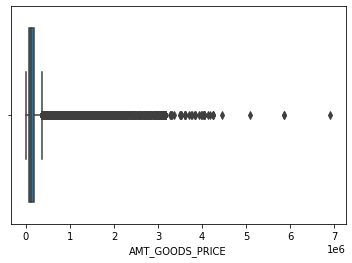

In [138]:
# plotting values of AMT_GOODS_PRICE in a box plot to find the outliers
sns.boxplot(previous_application.AMT_GOODS_PRICE)
plt.show()

- There are outliers present in AMT_Goods_PRICE. The below line of code will find the Upper fence of the box plot or the maximum value so that the records greater than the missing values can be removed

In [139]:
q1 = previous_application['AMT_GOODS_PRICE'].quantile(0.25)
q3 = previous_application['AMT_GOODS_PRICE'].quantile(0.75)
IQR = q3 - q1
Upper_fence = q3 + (1.5 * IQR)
print(Upper_fence)

360000.0


In [140]:
# percentage of records with AMT_GOODS_PRICE > 360000 with respect to total records of AMT_GOOD_PRICE
((previous_application['AMT_GOODS_PRICE']>360000).sum()/previous_application['AMT_GOODS_PRICE'].shape[0])*100

13.564393519955612

- These outliers are very small in numbers with respect to the whole dataset so these records with the outliers could be removed.

In [141]:
previous_application = previous_application[~(previous_application['AMT_GOODS_PRICE']>360000)]

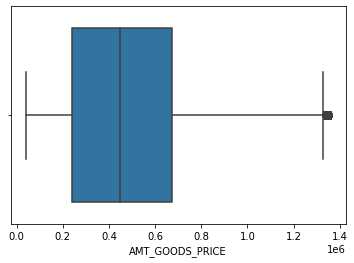

In [142]:
# plotting box plot for AMT_GOODS_PRICE after removing the outliers
sns.boxplot(application_data.AMT_GOODS_PRICE)
plt.show()

#### AMT_ANNUITY

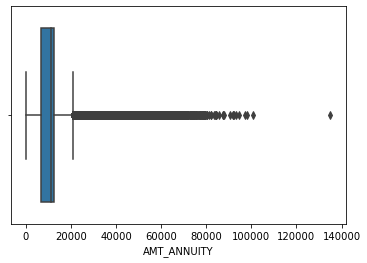

In [143]:
# plotting values of AMT_ANNUITY in a box plot to find the outliers
sns.boxplot(previous_application.AMT_ANNUITY)
plt.show()

- There are outliers present in AMT_ANNUITY. The below line of code will find the Upper fence of the box plot or the maximum value so that the records greater than the missing values can be removed

In [144]:
q1 = previous_application['AMT_ANNUITY'].quantile(0.25)
q3 = previous_application['AMT_ANNUITY'].quantile(0.75)
IQR = q3 - q1
Upper_fence = q3 + (1.5 * IQR)
print(Upper_fence)

21072.290625


In [145]:
# percentage of records with AMT_ANNUITY > 21072.290625 with respect to total records of AMT_ANNUITY
((previous_application['AMT_ANNUITY']>21072.290625).sum()/previous_application['AMT_ANNUITY'].shape[0])*100

8.335970183524772

- These outliers are very small in numbers with respect to the whole dataset so these records with the outliers could be removed.

In [146]:
previous_application = previous_application[~(previous_application['AMT_ANNUITY']>21072.290625)]

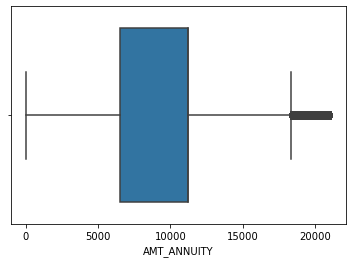

In [147]:
# plotting box plot for AMT_ANNUITY after removing the outliers
sns.boxplot(previous_application.AMT_ANNUITY)
plt.show()

- There are still some outliers present in the dataset which can be removed

In [148]:
q1 = previous_application['AMT_ANNUITY'].quantile(0.25)
q3 = previous_application['AMT_ANNUITY'].quantile(0.75)
IQR = q3 - q1
Upper_fence = q3 + (1.5 * IQR)
print(Upper_fence)

18327.67875


In [149]:
previous_application = previous_application[~(previous_application['AMT_ANNUITY']>18327.67875)]

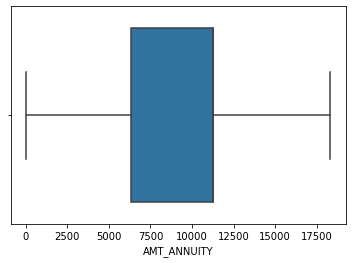

In [150]:
# plotting box plot for AMT_ANNUITY after removing the outliers
sns.boxplot(previous_application.AMT_ANNUITY)
plt.show()

#### AMT_CREDIT

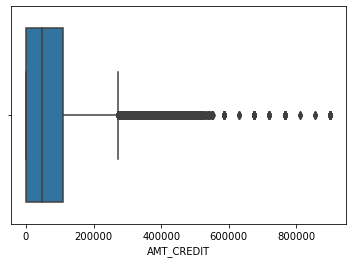

In [151]:
# plotting values of AMT_CREDIT in a box plot to find the outliers
sns.boxplot(previous_application.AMT_CREDIT)
plt.show()

- There are outliers present in AMT_CREDIT. The below line of code will find the Upper fence of the box plot or the maximum value so that the records greater than the missing values can be removed

In [152]:
q1 = previous_application['AMT_CREDIT'].quantile(0.25)
q3 = previous_application['AMT_CREDIT'].quantile(0.75)
IQR = q3 - q1
Upper_fence = q3 + (1.5 * IQR)
print(Upper_fence)

273465.0


In [153]:
# percentage of records with AMT_CREDIT > 273465.0 with respect to total records of AMT_CREDIT
((previous_application['AMT_CREDIT']>273465.0).sum()/previous_application['AMT_CREDIT'].shape[0])*100

2.774887105759088

- These outliers are very small in numbers with respect to the whole dataset so these records with the outliers could be removed.

In [154]:
previous_application = previous_application[~(previous_application['AMT_CREDIT']>273465.0)]

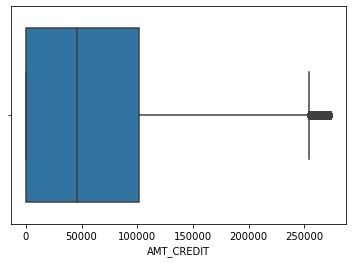

In [155]:
# plotting values of AMT_CREDIT in a box plot after removing outliers
sns.boxplot(previous_application.AMT_CREDIT)
plt.show()

- There are still some outliers present in the dataset. We can remove those as well

In [156]:
q1 = previous_application['AMT_CREDIT'].quantile(0.25)
q3 = previous_application['AMT_CREDIT'].quantile(0.75)
IQR = q3 - q1
Upper_fence = q3 + (1.5 * IQR)
print(Upper_fence)

253946.25


In [157]:
# percentage of records with AMT_CREDIT > 253946.25 with respect to total records of AMT_CREDIT
((previous_application['AMT_CREDIT']>253946.25).sum()/previous_application['AMT_CREDIT'].shape[0])*100

1.7495267979847975

In [158]:
previous_application = previous_application[~(previous_application['AMT_CREDIT']>253946.25)]

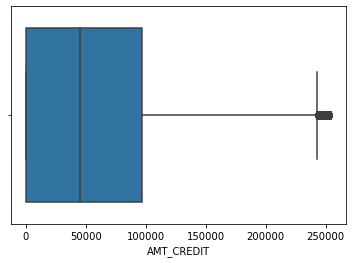

In [159]:
# plotting values of AMT_CREDIT in a box plot after removing outliers
sns.boxplot(previous_application.AMT_CREDIT)
plt.show()

# Merge both dataframes

In [160]:
# Since both the dataframes are now cleaned, we can merge both on the common column 'SK_ID_CURR'
credit_dataset = application_data.merge(previous_application, on = 'SK_ID_CURR')

In [161]:
credit_dataset

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,179055.0,179055.0,Approved,606,New,POS,Stone,500,24.0,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,68053.5,68809.5,Approved,2341,Refreshed,POS,Country-wide,200,12.0,POS household with interest
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,20106.0,24282.0,Approved,815,New,POS,Regional / Local,30,4.0,POS mobile without interest
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,112320.0,Canceled,181,Repeater,Unknown,Credit and cash offices,-1,12.0,Card Street
4,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,112320.0,Canceled,181,Repeater,Unknown,Credit and cash offices,-1,12.0,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788581,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,21456.0,18846.0,Approved,322,New,POS,Country-wide,63,14.0,POS mobile with interest
788582,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,112815.0,102037.5,Approved,991,Refreshed,POS,Regional / Local,500,12.0,POS industry with interest
788583,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,93298.5,82404.0,Approved,456,Repeater,POS,Country-wide,50,12.0,POS mobile with interest
788584,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,45000.0,45000.0,Refused,456,Repeater,Cards,Country-wide,20,0.0,Card Street


In [162]:
# checking the null values in credit_dataset
credit_dataset.isnull().sum().sum()

1020

- Since there are many records present in the dataset, it would be easy to bin the AMT_INCOME_TOTAL, AMT_CREDIT_x and AGE column so that the plots for these variables will be clear and we can draw correct insights

In [163]:
credit_dataset.AMT_INCOME_TOTAL.value_counts()

135000.0    98130
112500.0    82891
157500.0    76918
180000.0    70174
225000.0    55790
            ...  
716323.5        1
380700.0        1
179163.0        1
44955.0         1
131125.5        1
Name: AMT_INCOME_TOTAL, Length: 1406, dtype: int64

In [164]:
credit_dataset.AMT_CREDIT_x.value_counts()

450000.0     28714
225000.0     22431
675000.0     21047
270000.0     19638
180000.0     17956
             ...  
522576.0         1
900243.0         1
603477.0         1
472545.0         1
1235344.5        1
Name: AMT_CREDIT_x, Length: 4073, dtype: int64

In [165]:
#Binning the values of AMT_INCOME_TOTAL
abins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,550000,10000000000]
alabel = ['0-50000','50000-100000','100000-150000', '150000-200000',
       '200000-250000','250000-300000','300000-350000','350000-400000','400000-450000',
          '450000-500000','500000-550000','550000 and above']
credit_dataset['INCOME'] = pd.cut(credit_dataset.AMT_INCOME_TOTAL,bins = abins,labels = alabel)

In [166]:
#Binning the values of AMT_CREDIT_x
bbins = [0,200000,300000,400000,500000,600000,700000,800000,900000,1000000000]
blabel = ['0-200000','200000-300000', '300000-400000','400000-500000','500000-600000','600000-700000',
          '700000-800000','800000-900000','900000 and above']
credit_dataset['CREDIT'] = pd.cut(credit_dataset.AMT_CREDIT_x,bins = bbins,labels = blabel)

In [167]:
print(credit_dataset.AGE.min())
print(credit_dataset.AGE.max())

20.52
69.04


In [168]:
#Binning the values of AGE (Since the values of Age field are between 20-70 in our dataset, we will bin according to that)
cbins = [20,30,40,50,60,70]
clabel = ['20-30', '30-40',
       '40-50','50-60','60 and above']
credit_dataset['AGE'] = pd.cut(credit_dataset.AGE,bins = cbins,labels = clabel)

In [169]:
credit_dataset.DAYS_DECISION.max()

2830

In [170]:
#Binning the values of Employed_years
abins = [0,250,500,750,1000,1250,1500,2000,2500,3000]
alabel = ['0-250','250-500','500-750','750-1000','1000-1250','1250-1500','1500-2000','2000-2500','2500 and above']
credit_dataset['DAYS_DECISION'] = pd.cut(credit_dataset.DAYS_DECISION,bins = abins,labels = alabel)

In [171]:
credit_dataset

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,PRODUCT_COMBINATION,INCOME,CREDIT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Approved,500-750,New,POS,Stone,500,24.0,POS other with interest,200000-250000,400000-500000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Approved,2000-2500,Refreshed,POS,Country-wide,200,12.0,POS household with interest,250000-300000,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Approved,750-1000,New,POS,Regional / Local,30,4.0,POS mobile without interest,50000-100000,0-200000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Canceled,0-250,Repeater,Unknown,Credit and cash offices,-1,12.0,Card Street,100000-150000,300000-400000
4,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Canceled,0-250,Repeater,Unknown,Credit and cash offices,-1,12.0,Cash,100000-150000,300000-400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788581,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,Approved,250-500,New,POS,Country-wide,63,14.0,POS mobile with interest,150000-200000,300000-400000
788582,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Approved,750-1000,Refreshed,POS,Regional / Local,500,12.0,POS industry with interest,150000-200000,600000-700000
788583,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Approved,250-500,Repeater,POS,Country-wide,50,12.0,POS mobile with interest,150000-200000,600000-700000
788584,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Refused,250-500,Repeater,Cards,Country-wide,20,0.0,Card Street,150000-200000,600000-700000


# Imbalance percentage

In [172]:
# Calculating the imbalance percentage of application_data
(credit_dataset.TARGET==0).sum()/(credit_dataset.TARGET==1).sum()

9.373401736385162

In [173]:
(credit_dataset.TARGET.value_counts()/credit_dataset.TARGET.count())*100

0    90.359961
1     9.640039
Name: TARGET, dtype: float64

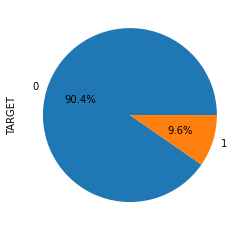

In [174]:
#Plotting the percentage of target = 0 and target = 1 for application_data in a pie chart to observe the imbalance between them
((credit_dataset.TARGET.value_counts()/credit_dataset.TARGET.count())*100).plot.pie(autopct = '%1.1f%%')
plt.show()

- The imbalance between the data with target = 0 and target = 1 is very high so we will be dividing the dataset into two dataframes of target 0 and target 1 and use data visualization techniques to compare them and draw any insights using other columns in the dataframes

# Dividing the dataset

In [175]:
target_df0 = credit_dataset[credit_dataset.TARGET==0]
target_df1 = credit_dataset[credit_dataset.TARGET==1]

In [176]:
target_df0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,PRODUCT_COMBINATION,INCOME,CREDIT
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Approved,2000-2500,Refreshed,POS,Country-wide,200,12.0,POS household with interest,250000-300000,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Approved,750-1000,New,POS,Regional / Local,30,4.0,POS mobile without interest,50000-100000,0-200000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Canceled,0-250,Repeater,Unknown,Credit and cash offices,-1,12.0,Card Street,100000-150000,300000-400000
4,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Canceled,0-250,Repeater,Unknown,Credit and cash offices,-1,12.0,Cash,100000-150000,300000-400000
5,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Approved,500-750,New,POS,Stone,30,12.0,POS industry with interest,100000-150000,300000-400000


In [177]:
target_df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,PRODUCT_COMBINATION,INCOME,CREDIT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Approved,500-750,New,POS,Stone,500,24.0,POS other with interest,200000-250000,400000-500000
95,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,Approved,1250-1500,Refreshed,Cash,Credit and cash offices,-1,24.0,Cash X-Sell: high,200000-250000,900000 and above
96,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,Approved,2500 and above,New,POS,Country-wide,27,10.0,POS mobile with interest,200000-250000,900000 and above
97,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,Refused,1000-1250,Repeater,Cash,Credit and cash offices,-1,36.0,Cash X-Sell: high,200000-250000,900000 and above
100,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,Approved,1250-1500,Repeater,POS,Country-wide,30,10.0,POS mobile with interest,100000-150000,200000-300000


# Univariate Analysis

In [178]:
credit_dataset.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'ORGANIZATION_TYPE',
       'EXT_SOURCE_2', 'AGE', 'Employed_years', 'SK_ID_PREV',
       'NAME_CONTRACT_TYPE_y', 'AMT_ANNUITY_y', 'AMT_APPLICATION',
       'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y', 'NAME_CONTRACT_STATUS',
       'DAYS_DECISION', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'CNT_PAYMENT', 'PRODUCT_COMBINATION', 'INCOME',
       'CREDIT'],
      dtype='object')

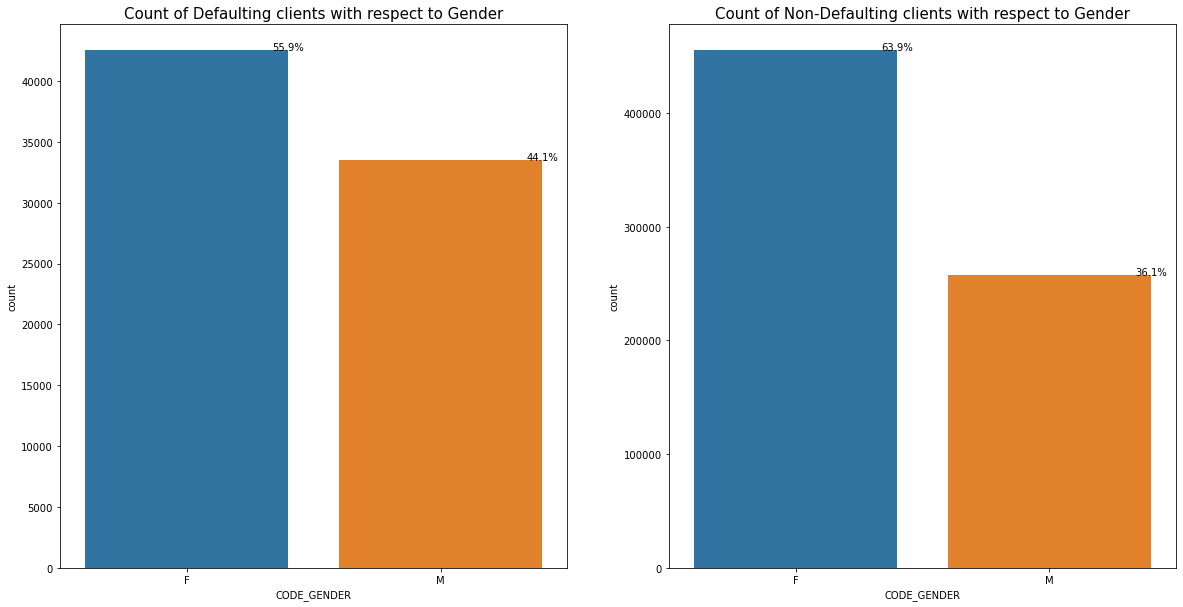

In [179]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
total = float(len(target_df1))
ax1 = sns.countplot(x="CODE_GENDER", data=target_df1, order = target_df1.CODE_GENDER.value_counts().index)
plt.title('Count of Defaulting clients with respect to Gender', fontsize=15)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
    

plt.subplot(1,2,2)
total = float(len(target_df0))
ax2 = sns.countplot(x="CODE_GENDER", data=target_df0, order = target_df0.CODE_GENDER.value_counts().index)
plt.title('Count of Non-Defaulting clients with respect to Gender', fontsize=15)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

- From the above plot, following points can be inferred
    - Females take more loans than males
    - The percentage of females defaulting the loan is 56.4% and not defaulting is 64.4% where as the percentage of males defaulting the loan is 43.6% and not defaulting is 35.6%
    - Males are tend to default the loans more than females

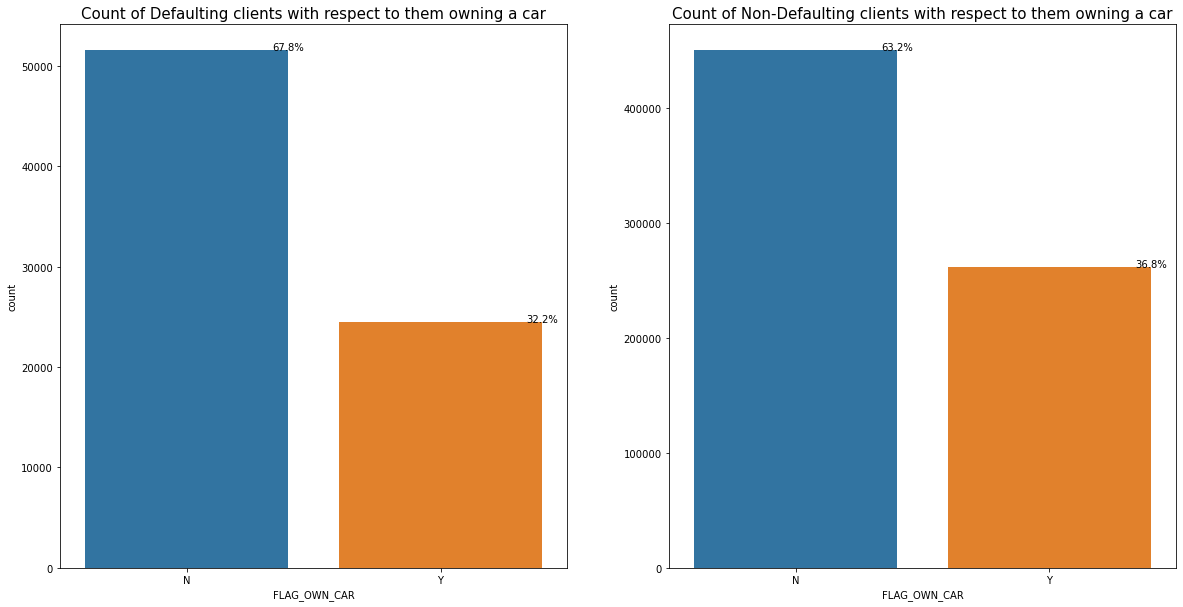

In [180]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
total = float(len(target_df1))
ax1 = sns.countplot(x="FLAG_OWN_CAR", data=target_df1, order = target_df1.FLAG_OWN_CAR.value_counts().index)
plt.title('Count of Defaulting clients with respect to them owning a car', fontsize=15)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
    

plt.subplot(1,2,2)
total = float(len(target_df0))
ax2 = sns.countplot(x="FLAG_OWN_CAR", data=target_df0, order = target_df0.FLAG_OWN_CAR.value_counts().index)
plt.title('Count of Non-Defaulting clients with respect to them owning a car', fontsize=15)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

- From the above plot, following points can be inferred
    - The number of people who don't own a car tend to take more loans than those who own a car
    - The percentage of people who doesn't own a car and default the loan is greater than the percentage of people who doesn't
    - The percentage of people who own a car and default the loan is less than the percentage of people who doesn't default
    - This means that the clients who doesn't own a car tend to default the loans more than those wo own a car

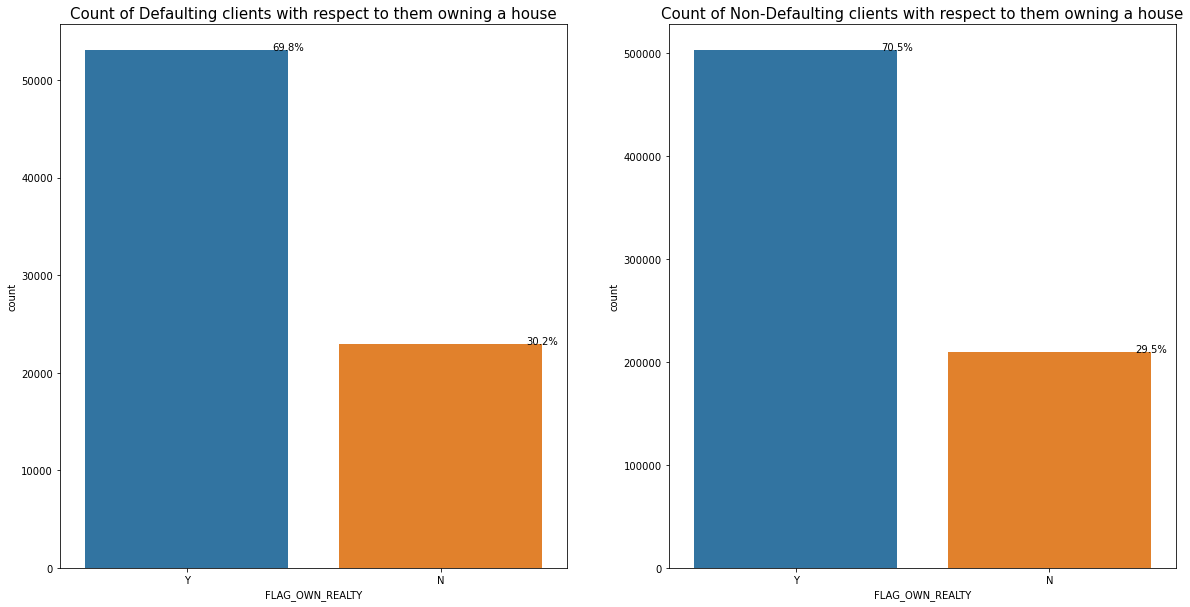

In [181]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
total = float(len(target_df1))
ax1 = sns.countplot(x="FLAG_OWN_REALTY", data=target_df1, order = target_df1.FLAG_OWN_REALTY.value_counts().index)
plt.title('Count of Defaulting clients with respect to them owning a house', fontsize=15)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
    

plt.subplot(1,2,2)
total = float(len(target_df0))
ax2 = sns.countplot(x="FLAG_OWN_REALTY", data=target_df0, order = target_df0.FLAG_OWN_REALTY.value_counts().index)
plt.title('Count of Non-Defaulting clients with respect to them owning a house', fontsize=15)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

- There is only a slight difference in the percentages of count of people defaulting or non-defaulting a loan with respect to them owning a house.
- According to the above plots, it can be seen that the person not owning a house tend to default the loan as compared to a person owning a house

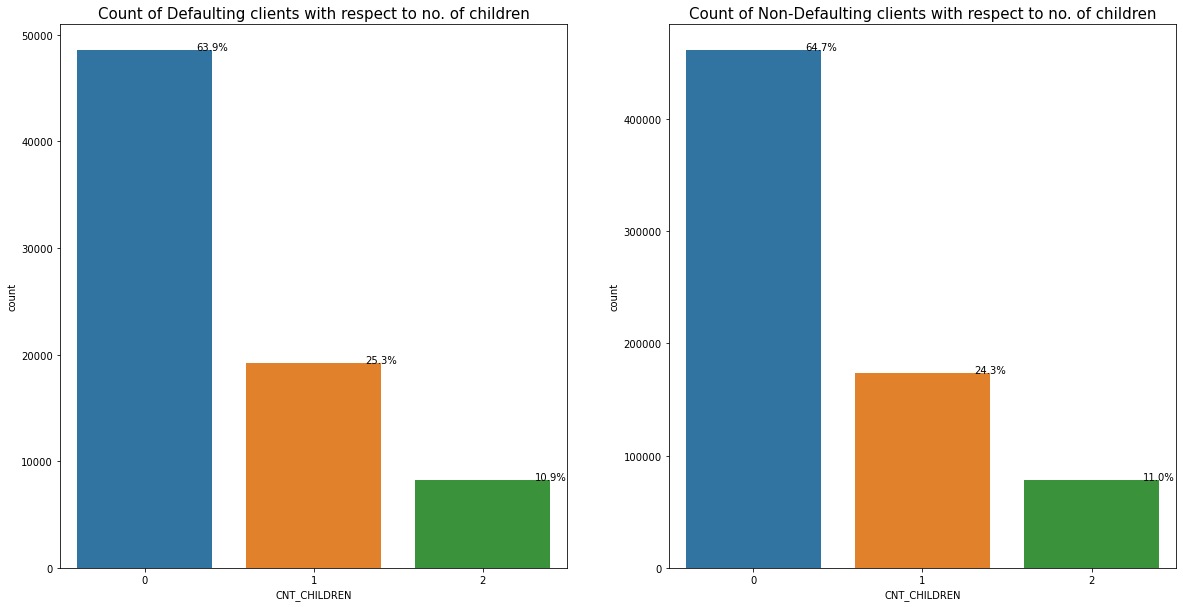

In [182]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
total = float(len(target_df1))
ax1 = sns.countplot(x="CNT_CHILDREN", data=target_df1, order = target_df1.CNT_CHILDREN.value_counts().index)
plt.title('Count of Defaulting clients with respect to no. of children', fontsize=15)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
    

plt.subplot(1,2,2)
total = float(len(target_df0))
ax2 = sns.countplot(x="CNT_CHILDREN", data=target_df0, order = target_df0.CNT_CHILDREN.value_counts().index)
plt.title('Count of Non-Defaulting clients with respect to no. of children', fontsize=15)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

- From the above plots, the following insights can be inferred
    - People with no children tend to take more loans than people with 1 or 2 children
    - The percentage of people with no children and defaulting loan is 64.8% and people with no children and not defaulting the loan is 66.0% which means that although people with no children take more loans but the probability of them defaulting the loan is less
    - People with 1 child and defaulting the loan is 24.5% and not defaulting is 23.4% which means that a person with 1 child might have the possibility to default the loan
    - There is no such difference in people with 2 children and them defaulting or not defaulting the loan so no insights can be drawn for that with this data

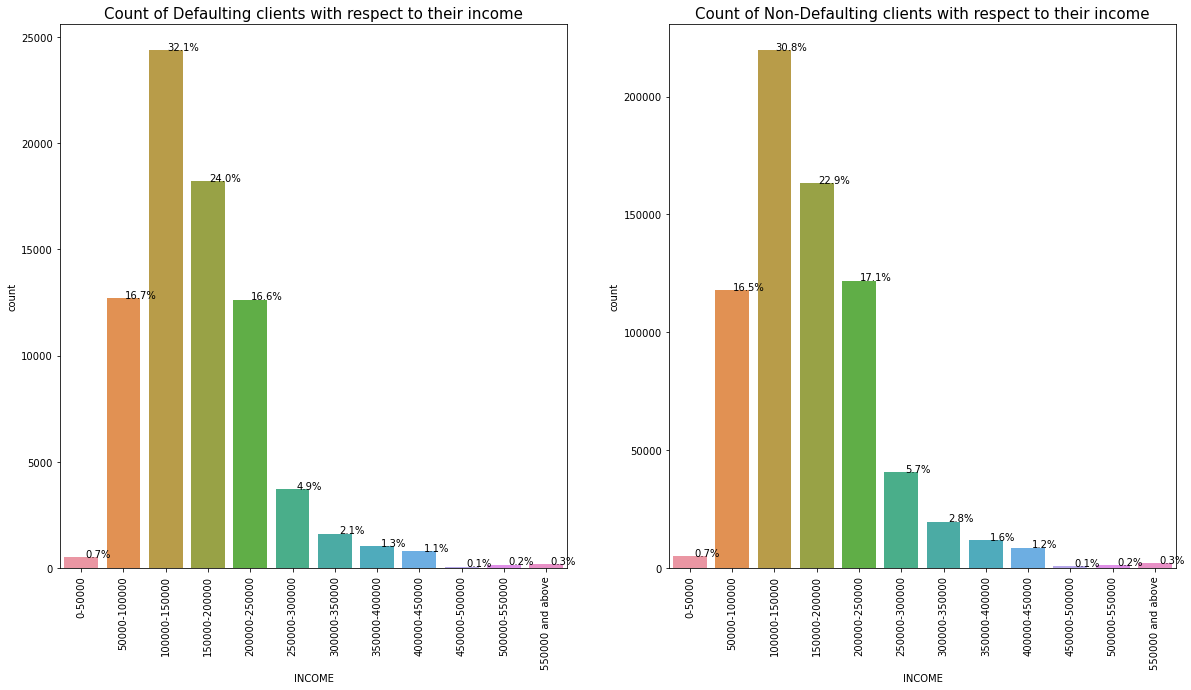

In [183]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
total = float(len(target_df1))
ax1 = sns.countplot(x="INCOME", data=target_df1, order = target_df1.INCOME.value_counts().index.categories)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
plt.title('Count of Defaulting clients with respect to their income', fontsize=15)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
    

plt.subplot(1,2,2)
total = float(len(target_df0))
ax2 = sns.countplot(x="INCOME", data=target_df0, order = target_df0.INCOME.value_counts().index.categories)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)
plt.title('Count of Non-Defaulting clients with respect to their income', fontsize=15)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

- From the above plots, we can draw the following insights
    - People with income 1,00,000 to 1,50,000 tend to take more loans than people with any other income.
    - People with salary in between 50,000 and 2,00,000 seems to default loans more

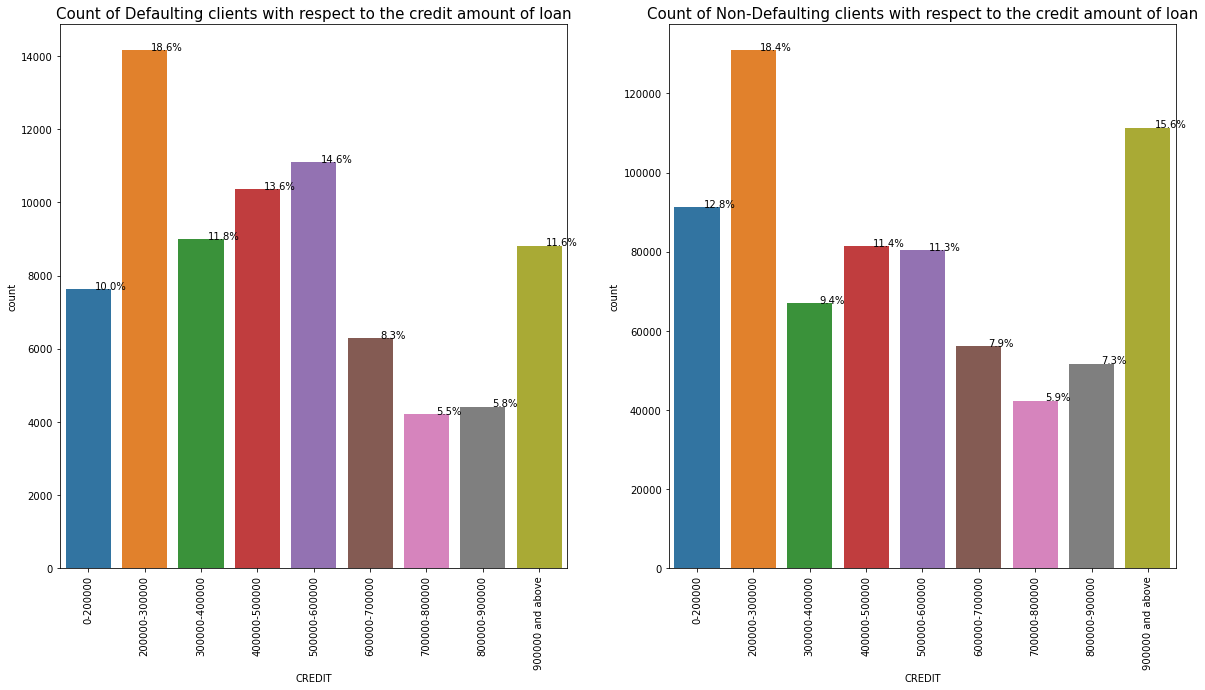

In [184]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
total = float(len(target_df1))
ax1 = sns.countplot(x="CREDIT", data=target_df1, order = target_df1.CREDIT.value_counts().index.categories)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
plt.title('Count of Defaulting clients with respect to the credit amount of loan', fontsize=15)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
    

plt.subplot(1,2,2)
total = float(len(target_df0))
ax2 = sns.countplot(x="CREDIT", data=target_df0, order = target_df0.CREDIT.value_counts().index.categories)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)
plt.title('Count of Non-Defaulting clients with respect to the credit amount of loan', fontsize=15)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

- Most people tend to take loan with amount between 2,00,000 to 3,00,000
- People who take loan for amount between 2,00,000 to 7,00,000 tend to default the loans more
- There is a significant difference between the percentage of count of people who take loan of 9,00,000 and above and default the loan and who doesn't default the loan. This means that people who take the loan of 9,00,000 or above have low probability of defaulting the loan

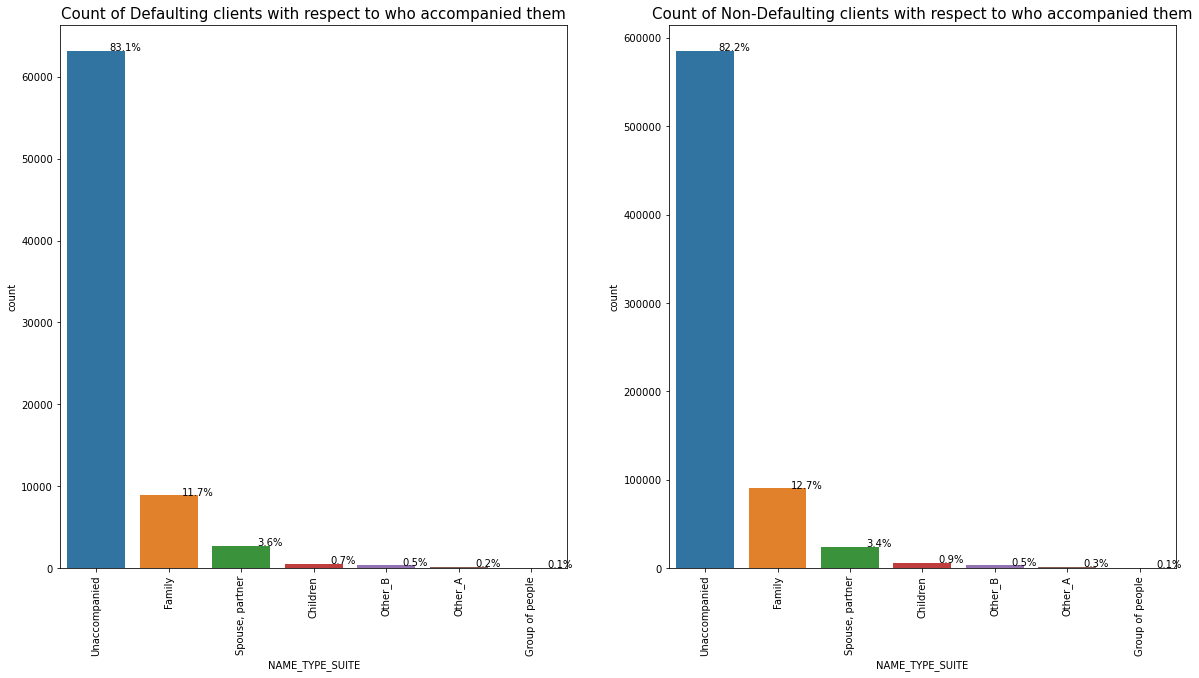

In [185]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
total = float(len(target_df1))
ax1 = sns.countplot(x="NAME_TYPE_SUITE", data=target_df1, order = target_df1.NAME_TYPE_SUITE.value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
plt.title('Count of Defaulting clients with respect to who accompanied them', fontsize=15)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
    

plt.subplot(1,2,2)
total = float(len(target_df0))
ax2 = sns.countplot(x="NAME_TYPE_SUITE", data=target_df0, order = target_df0.NAME_TYPE_SUITE.value_counts().index)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)
plt.title('Count of Non-Defaulting clients with respect to who accompanied them', fontsize=15)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

- It can be inferred from the above plots that most people who come to a=take loan are unaccompanies and there is also a slight chance that these people who come unaccompanied can default the loan.
- It can be seen that the percentage of people who come with their families to take the loan and default is less than those who doesn't default which means that the probability of a person defaulting the loan is less when he/she is accompanied by family while taking the loan

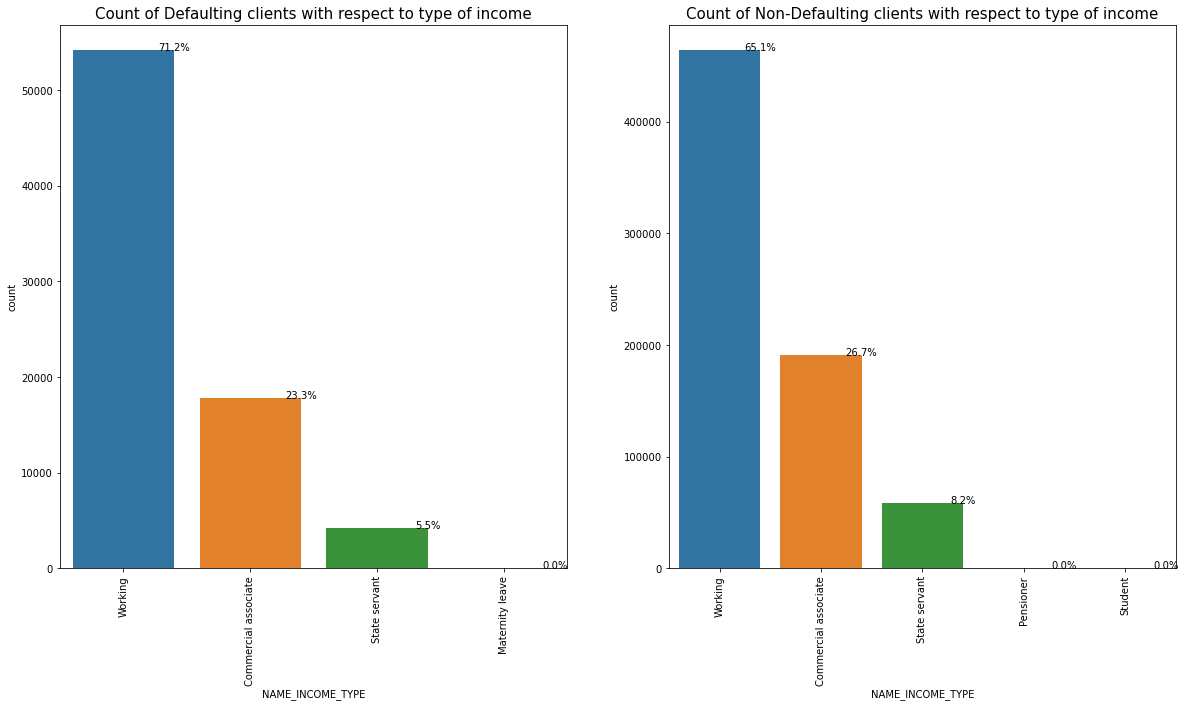

In [186]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
total = float(len(target_df1))
ax1 = sns.countplot(x="NAME_INCOME_TYPE", data=target_df1, order = target_df1.NAME_INCOME_TYPE.value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
plt.title('Count of Defaulting clients with respect to type of income', fontsize=15)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
    

plt.subplot(1,2,2)
total = float(len(target_df0))
ax2 = sns.countplot(x="NAME_INCOME_TYPE", data=target_df0, order = target_df0.NAME_INCOME_TYPE.value_counts().index)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)
plt.title('Count of Non-Defaulting clients with respect to type of income', fontsize=15)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

- From the above plots, it can be inferred that mostly the people in working class take loans
- The percentage of people in working class who default the loan is greater than those who doesn't default the loan which means the probability of working class people defaulting the loan is also high
- It can be observed that the people working as Commercial associate or State servant have less probability of defaulting the loan

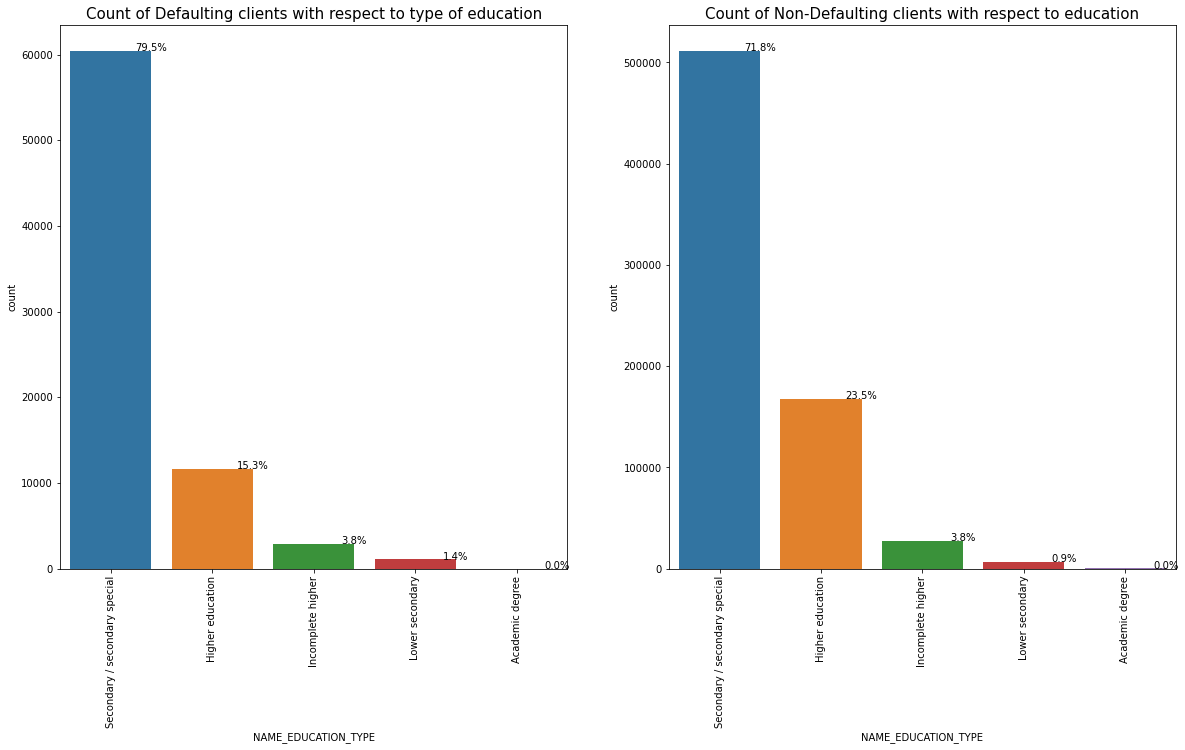

In [187]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
total = float(len(target_df1))
ax1 = sns.countplot(x="NAME_EDUCATION_TYPE", data=target_df1, order = target_df1.NAME_EDUCATION_TYPE.value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
plt.title('Count of Defaulting clients with respect to type of education', fontsize=15)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
    

plt.subplot(1,2,2)
total = float(len(target_df0))
ax2 = sns.countplot(x="NAME_EDUCATION_TYPE", data=target_df0, order = target_df0.NAME_EDUCATION_TYPE.value_counts().index)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)
plt.title('Count of Non-Defaulting clients with respect to education', fontsize=15)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

- From these plots above, it can bee seen that the people with only secondary/secondary special education take loans more than other people.
- The percentage of people with secondary/secondary special education or having lower secondary education who default the loan is greater than those who do not default the loan which means the probability that a person with these level of education will default the loan is higher
- Although the percentage of people who have Higher education and taking the loan is low but still the percentage of them defaulting the loan is less than them not defaulting the loan. This could be because if they have higher education, the chances of them being in a secure job is high so there is a less chance that they would have to default the loan

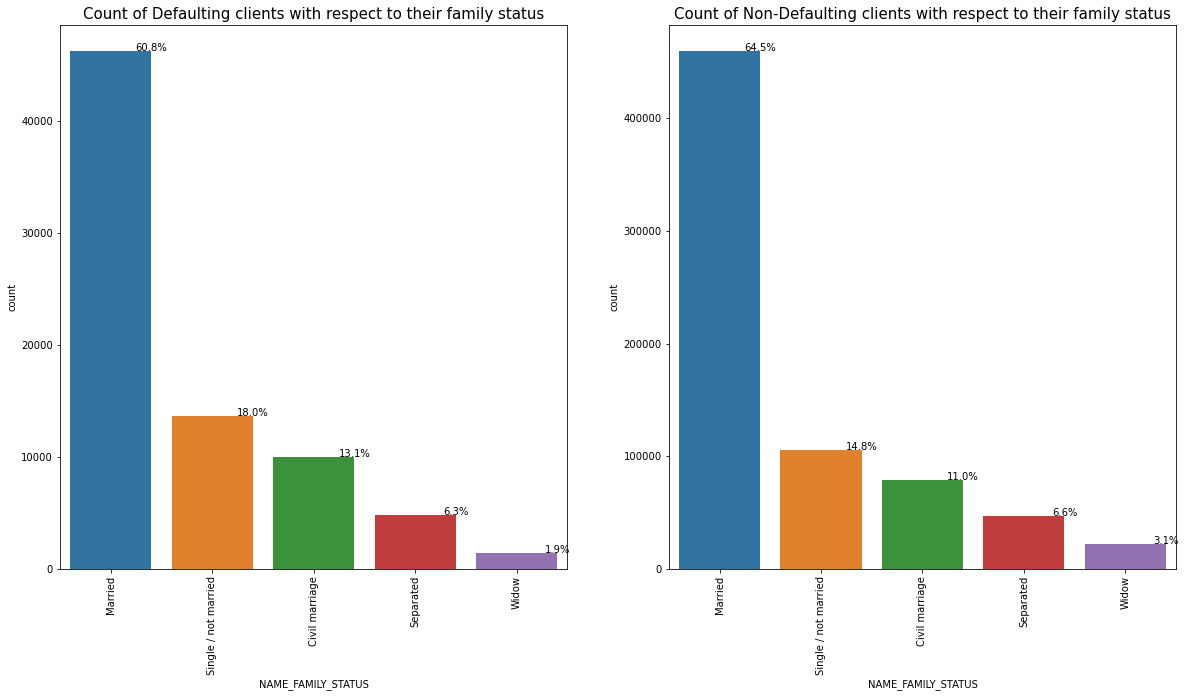

In [188]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
total = float(len(target_df1))
ax1 = sns.countplot(x="NAME_FAMILY_STATUS", data=target_df1, order = target_df1.NAME_FAMILY_STATUS.value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
plt.title('Count of Defaulting clients with respect to their family status', fontsize=15)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
    

plt.subplot(1,2,2)
total = float(len(target_df0))
ax2 = sns.countplot(x="NAME_FAMILY_STATUS", data=target_df0, order = target_df0.NAME_FAMILY_STATUS.value_counts().index)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)
plt.title('Count of Non-Defaulting clients with respect to their family status', fontsize=15)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

- The people who are married tend to take more loans than others but the probability of married people defaulting loans is less. It could be assumed that married people may have both the partners working which would make it easy to pay back the loan.
- Clients who are Seperated or Widowed have less probability of defaulting the loan
- The percentage of defaulting a loan by single/ not married people and Civil marriage people is high as compared to them not defaulting

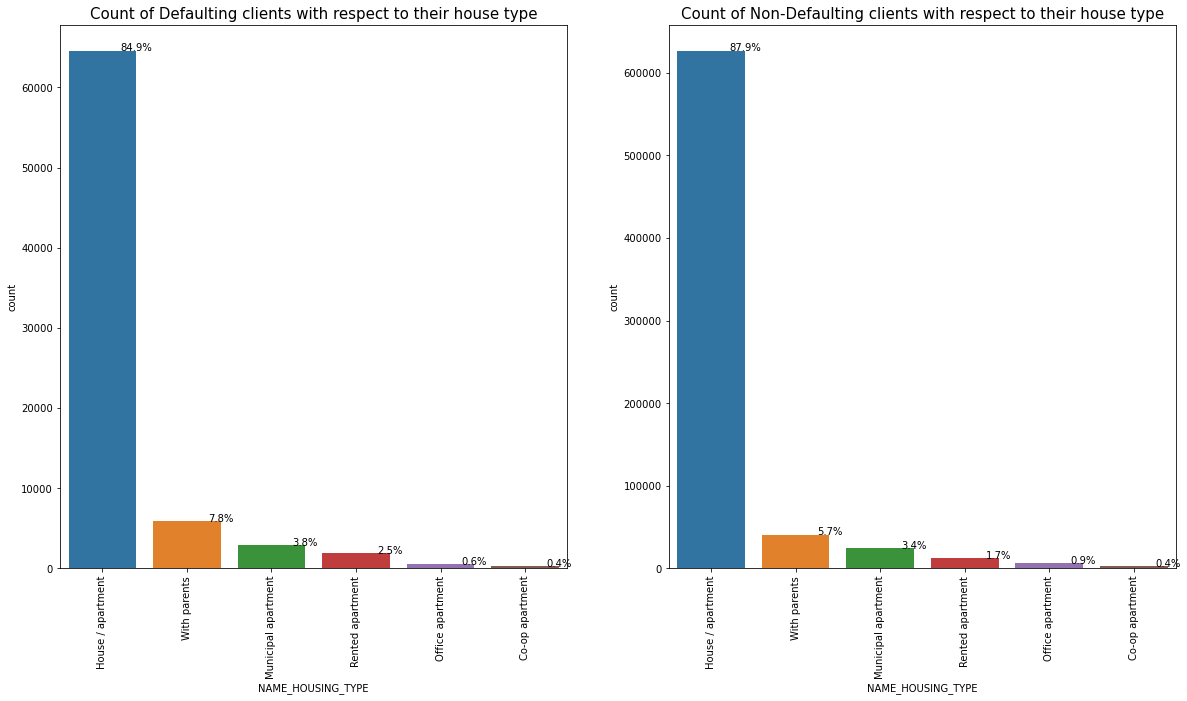

In [189]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
total = float(len(target_df1))
ax1 = sns.countplot(x="NAME_HOUSING_TYPE", data=target_df1, order = target_df1.NAME_HOUSING_TYPE.value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
plt.title('Count of Defaulting clients with respect to their house type', fontsize=15)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
    

plt.subplot(1,2,2)
total = float(len(target_df0))
ax2 = sns.countplot(x="NAME_HOUSING_TYPE", data=target_df0, order = target_df0.NAME_HOUSING_TYPE.value_counts().index)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)
plt.title('Count of Non-Defaulting clients with respect to their house type', fontsize=15)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

- People who have a house or a flat tend to take up more loans and they seem to not default their loans
- Whereas people who live with their parents have the probability of defaulting their loans
- Clients who live in municipal or rented apartments also tend to default the loans as the percentage of them defaulting the loans is greater than them not defaulting

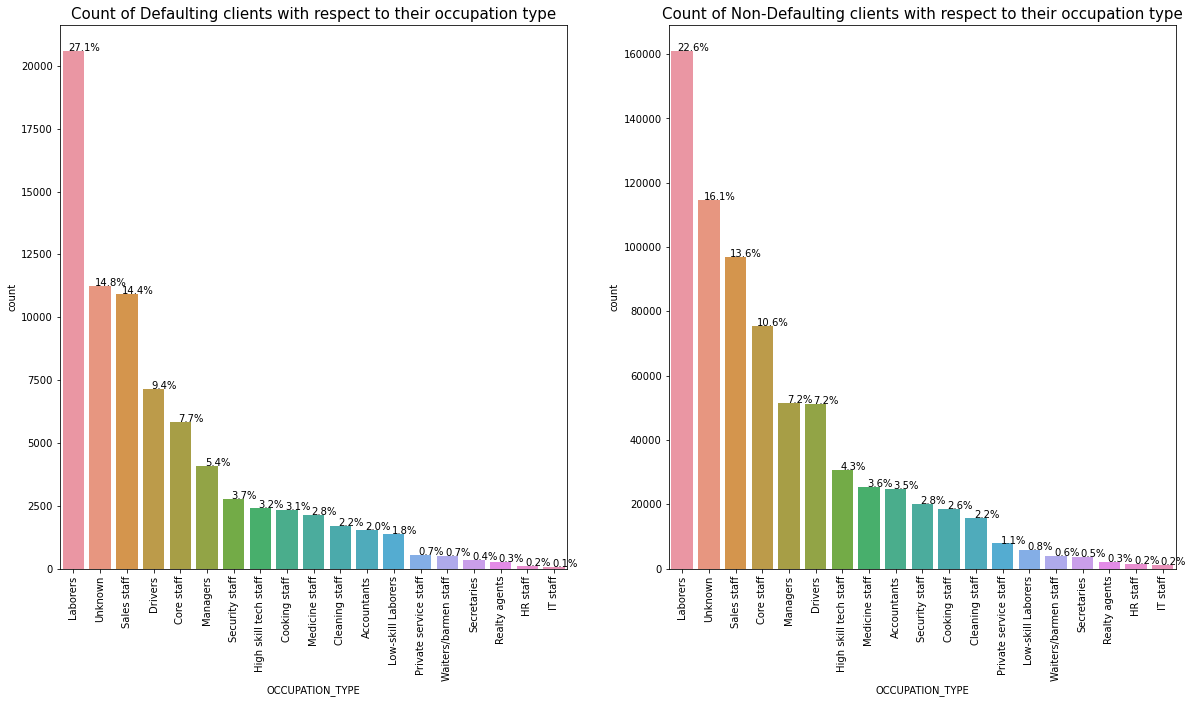

In [190]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
total = float(len(target_df1))
ax1 = sns.countplot(x="OCCUPATION_TYPE", data=target_df1, order = target_df1.OCCUPATION_TYPE.value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
plt.title('Count of Defaulting clients with respect to their occupation type', fontsize=15)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
    

plt.subplot(1,2,2)
total = float(len(target_df0))
ax2 = sns.countplot(x="OCCUPATION_TYPE", data=target_df0, order = target_df0.OCCUPATION_TYPE.value_counts().index)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)
plt.title('Count of Non-Defaulting clients with respect to their occupation type', fontsize=15)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

- From the above plots it can be inferred that mostly the labourers tend to take more loans than any other occupation type people and they have the highest percentage of defaulting loans which means although they take more loans, it can be risky to give loans to labourers
- The percentage of Sales staff and drivers defaulting the loan is greater than them not defaulting so it could be risky to give loans to them too
- The probability of managers or core staff defaulting a loan is less

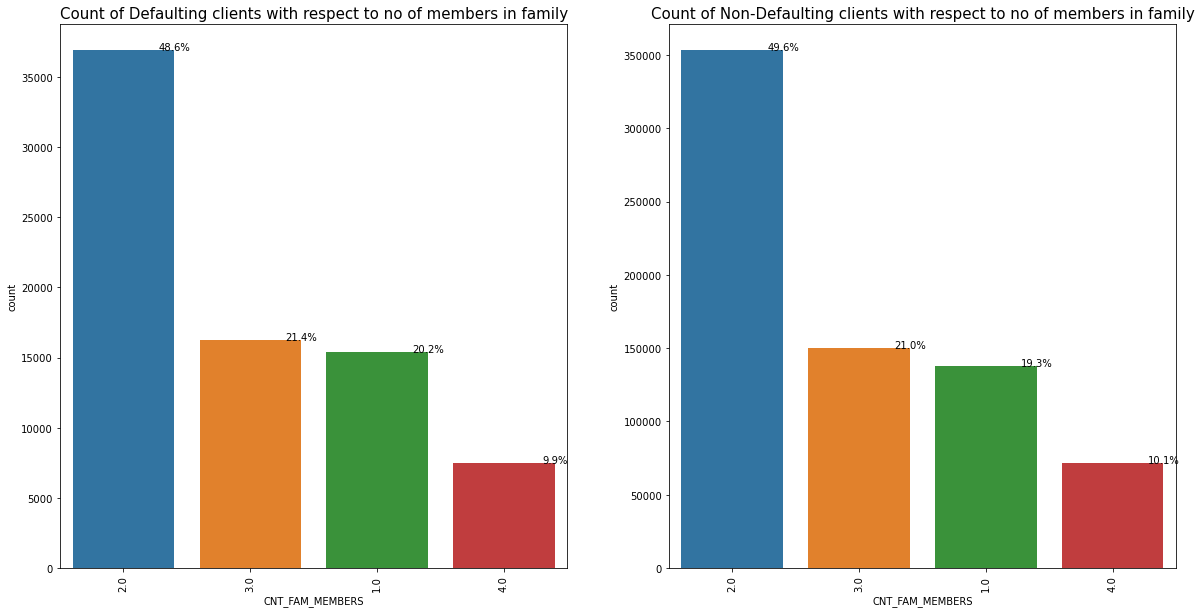

In [191]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
total = float(len(target_df1))
ax1 = sns.countplot(x="CNT_FAM_MEMBERS", data=target_df1, order = target_df1.CNT_FAM_MEMBERS.value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
plt.title('Count of Defaulting clients with respect to no of members in family', fontsize=15)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
    

plt.subplot(1,2,2)
total = float(len(target_df0))
ax2 = sns.countplot(x="CNT_FAM_MEMBERS", data=target_df0, order = target_df0.CNT_FAM_MEMBERS.value_counts().index)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)
plt.title('Count of Non-Defaulting clients with respect to no of members in family', fontsize=15)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

- There is no significant difference in the percentage of defaulting and non-defaulting clients with respect to number of members in the family. This factor is not affecting the pattern of clients defaulting a loan

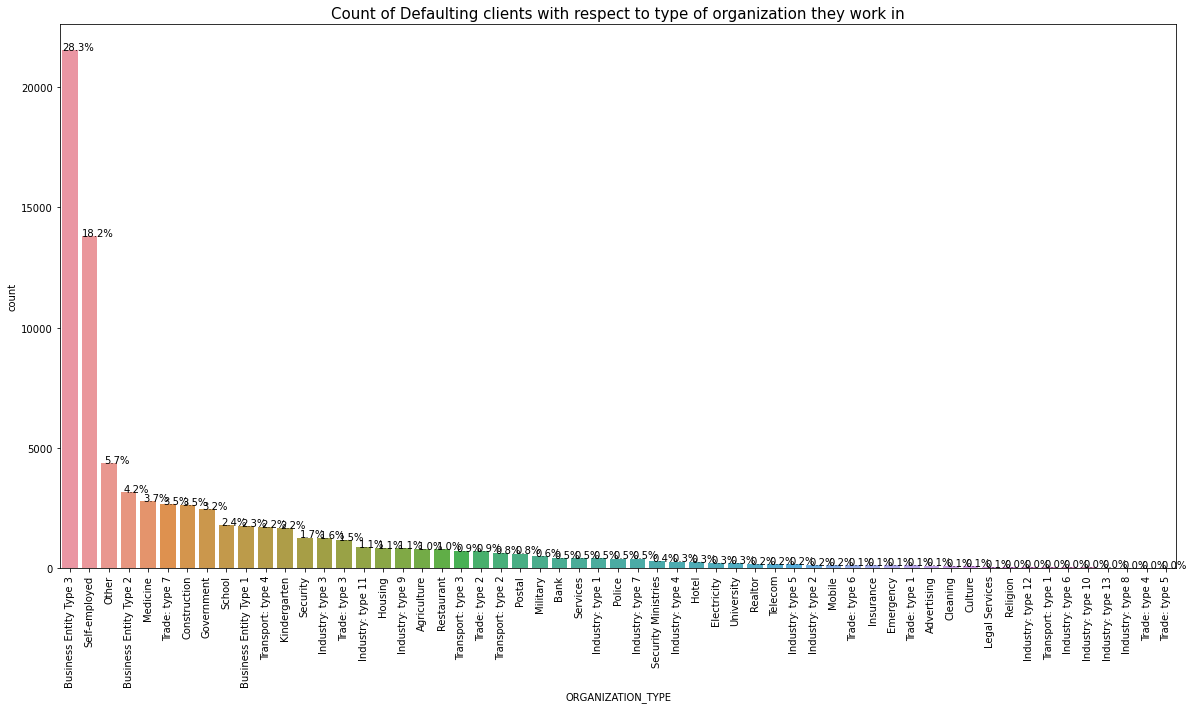

In [192]:
plt.figure(figsize=(20,10))
total = float(len(target_df1))
ax1 = sns.countplot(x="ORGANIZATION_TYPE", data=target_df1, order = target_df1.ORGANIZATION_TYPE.value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
plt.title('Count of Defaulting clients with respect to type of organization they work in', fontsize=15)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
    

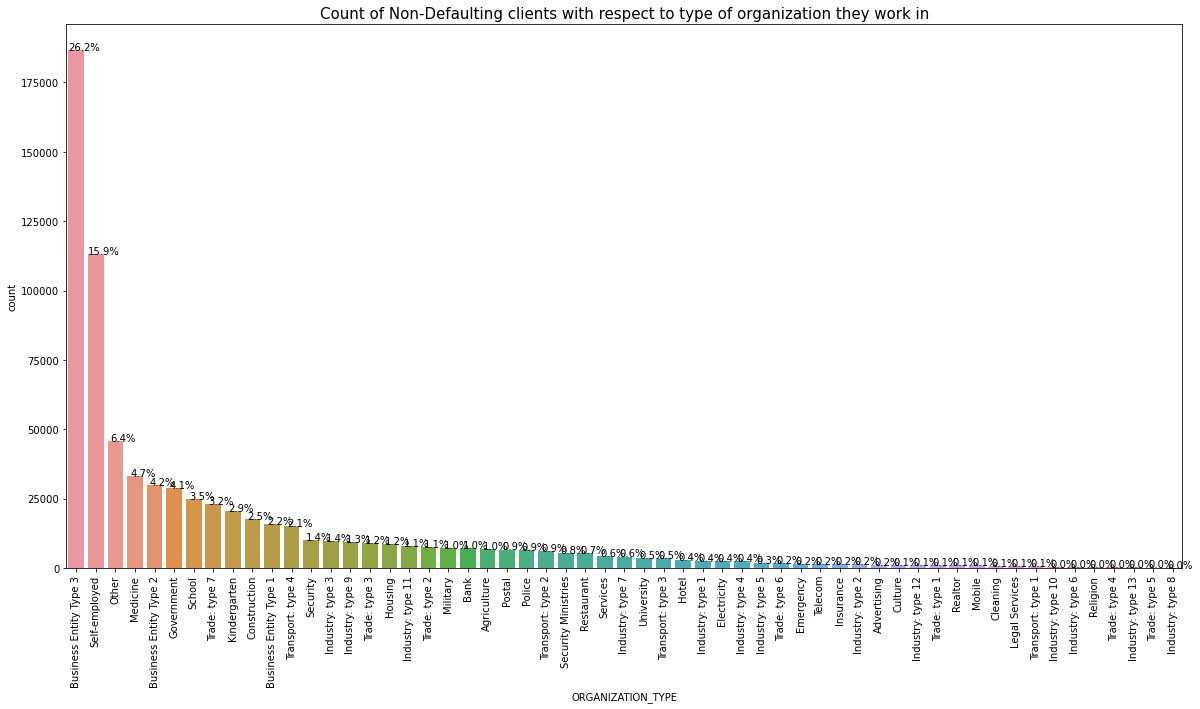

In [193]:
plt.figure(figsize=(20,10))
total = float(len(target_df0))
ax2 = sns.countplot(x="ORGANIZATION_TYPE", data=target_df0, order = target_df0.ORGANIZATION_TYPE.value_counts().index)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)
plt.title('Count of Non-Defaulting clients with respect to type of organization they work in', fontsize=15)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

- From the above two graphs, it can be inferred that people who work in Business Entity Type 3 or are Self employed tend to take more loans as compared to people who work in any other type of organization
- The percentage of people who are in Business Entity Type 3 or self employed who default the loan is greater than those who doesn't default the loan so it is risky to give loans to people who are either self employed ot work in Business Entity Type 3
- It can also be seen that clients whose organization type is medicine have low probability of defaulting a loan

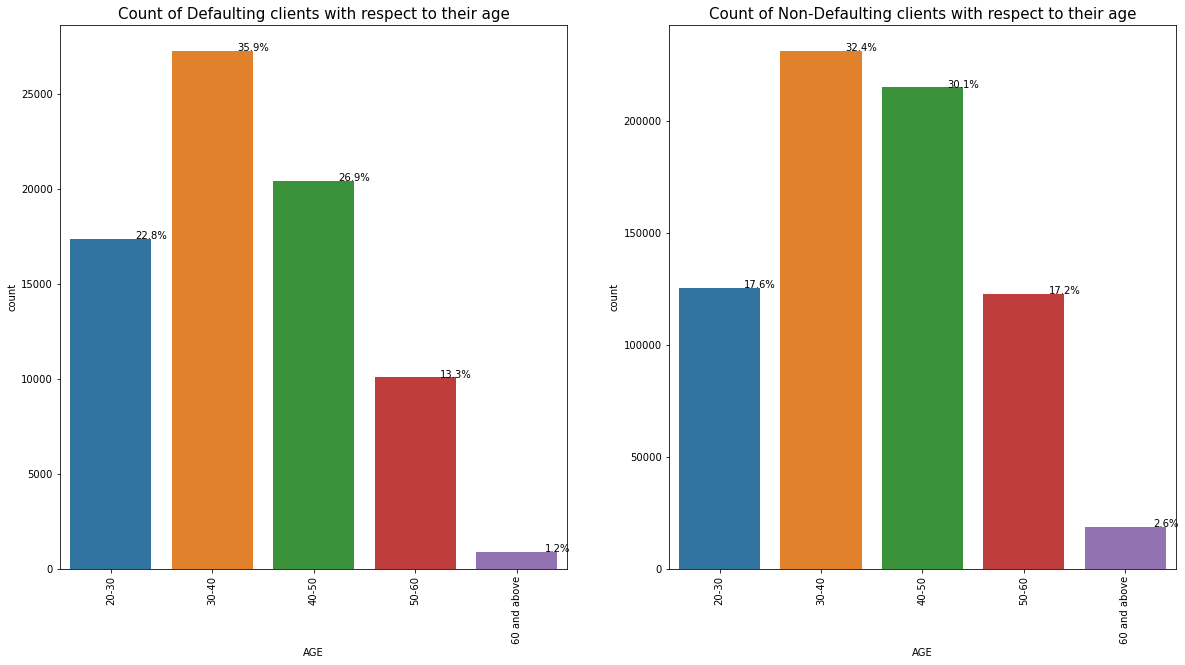

In [194]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
total = float(len(target_df1))
ax1 = sns.countplot(x="AGE", data=target_df1, order = target_df1.AGE.value_counts().index.categories)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
plt.title('Count of Defaulting clients with respect to their age', fontsize=15)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
    

plt.subplot(1,2,2)
total = float(len(target_df0))
ax2 = sns.countplot(x="AGE", data=target_df0, order = target_df0.AGE.value_counts().index.categories)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)
plt.title('Count of Non-Defaulting clients with respect to their age', fontsize=15)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

- The percentage of people in the age group 20-30 defaulting the loan is way higher than them not defaulting so it is a risk to give loans to people of this age group
- It can also be inferred that people in the age gropu 30-40 take more loans than any other age group
- The percentage of people defaulting loan who are older than 40 is less than them not defaulting the loan so it is safe to give loans to people who are older than 40. This could be because people who are older than 40 tends to have more savings and more secured jobs which make them paying back their loans easier than younger people.

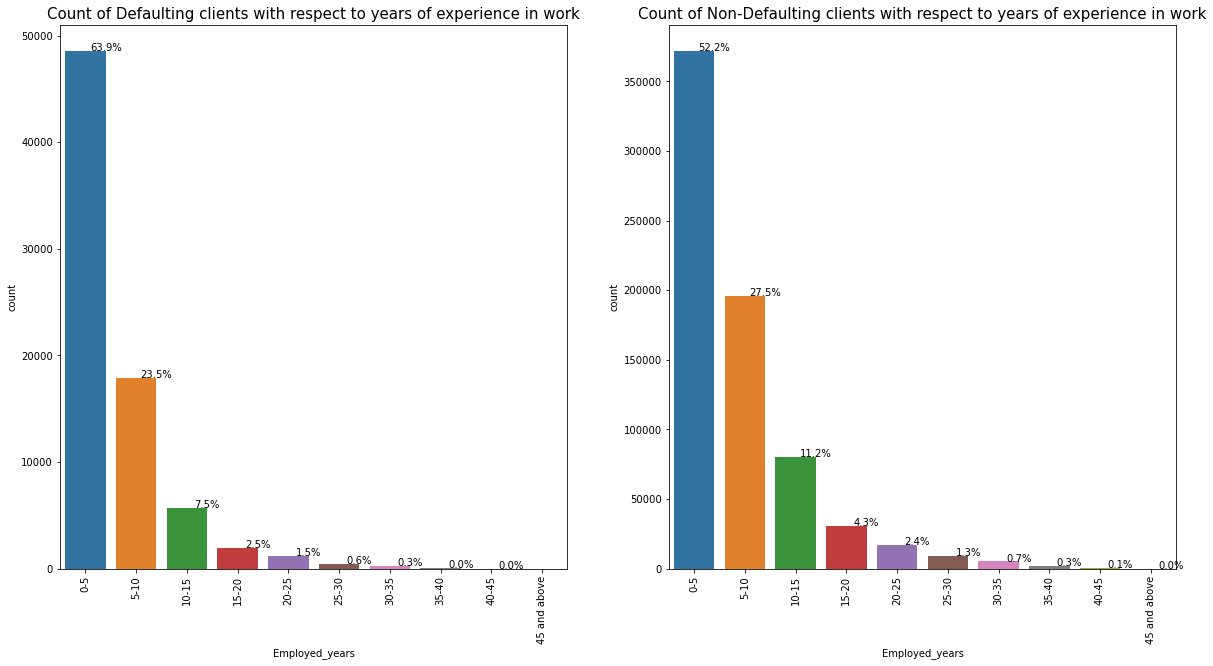

In [195]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
total = float(len(target_df1))
ax1 = sns.countplot(x="Employed_years", data=target_df1, order = target_df1.Employed_years.value_counts().index.categories)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
plt.title('Count of Defaulting clients with respect to years of experience in work', fontsize=15)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
    

plt.subplot(1,2,2)
total = float(len(target_df0))
ax2 = sns.countplot(x="Employed_years", data=target_df0, order = target_df0.Employed_years.value_counts().index.categories)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)
plt.title('Count of Non-Defaulting clients with respect to years of experience in work', fontsize=15)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

- It can be observed that most people who have less than 5 years of experience take more loan and they default the loan more as well. It could be risky to give loans to people with less than 5 years of experience.
- For people who have work experience greater than 5 years tend to have less probability to default.

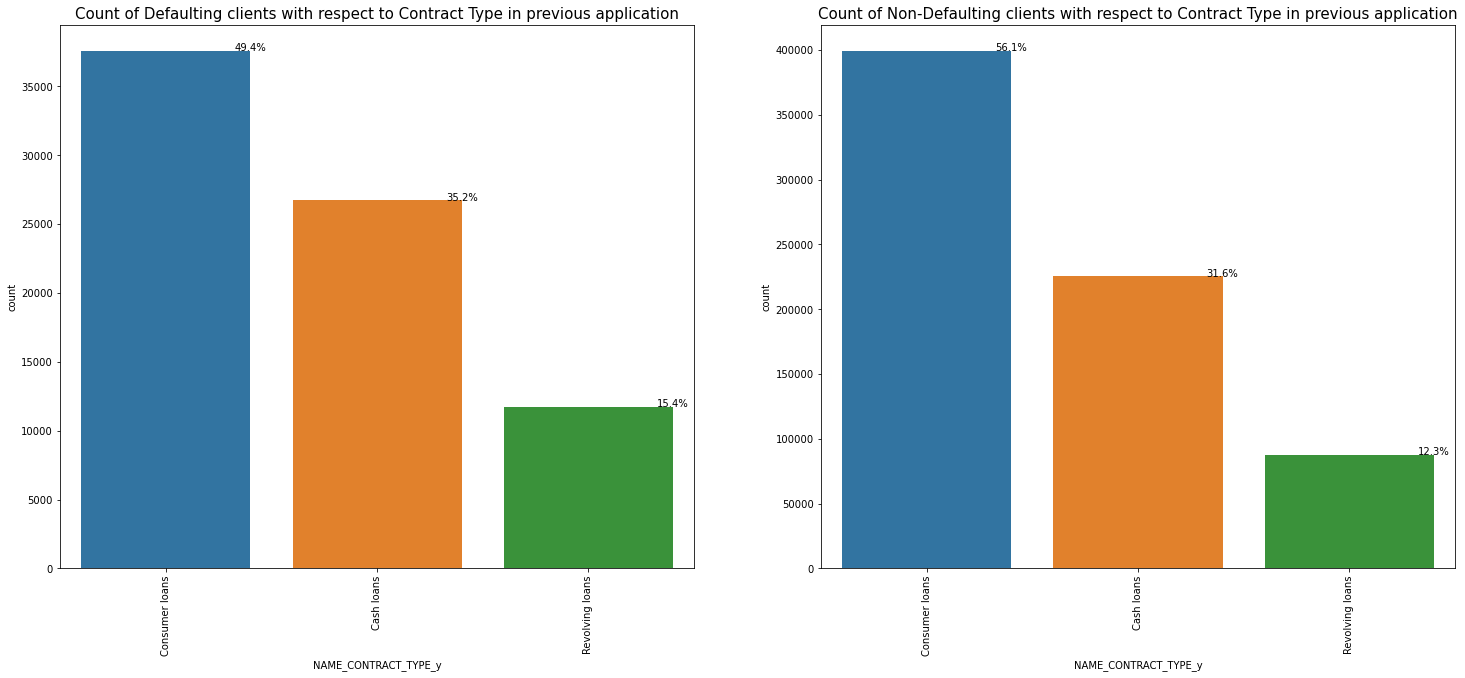

In [196]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
total = float(len(target_df1))
ax1 = sns.countplot(x="NAME_CONTRACT_TYPE_y", data=target_df1, order = target_df1.NAME_CONTRACT_TYPE_y.value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
plt.title('Count of Defaulting clients with respect to Contract Type in previous application', fontsize=15)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
    

plt.subplot(1,2,2)
total = float(len(target_df0))
ax2 = sns.countplot(x="NAME_CONTRACT_TYPE_y", data=target_df0, order = target_df0.NAME_CONTRACT_TYPE_y.value_counts().index)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)
plt.title('Count of Non-Defaulting clients with respect to Contract Type in previous application', fontsize=15)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

- People who took Cash loans or Revolving loans according to their previous application tend to default more when compared to consumer loans

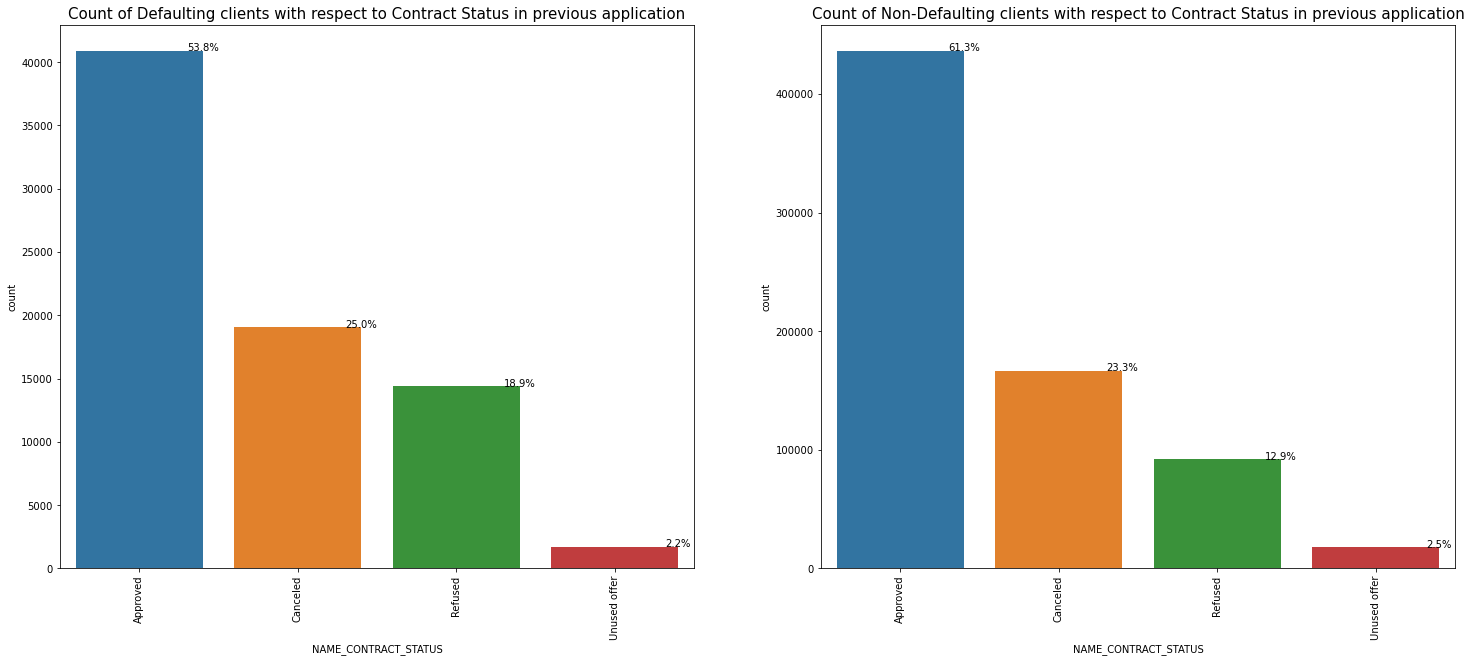

In [197]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
total = float(len(target_df1))
ax1 = sns.countplot(x="NAME_CONTRACT_STATUS", data=target_df1, order = target_df1.NAME_CONTRACT_STATUS.value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
plt.title('Count of Defaulting clients with respect to Contract Status in previous application', fontsize=15)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
    

plt.subplot(1,2,2)
total = float(len(target_df0))
ax2 = sns.countplot(x="NAME_CONTRACT_STATUS", data=target_df0, order = target_df0.NAME_CONTRACT_STATUS.value_counts().index)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)
plt.title('Count of Non-Defaulting clients with respect to Contract Status in previous application', fontsize=15)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

- People who have had their loan applications Cancelled or who got rejected in their previous application seems to have a high probability of defaulting the loans
- Clients with Approved status have less probability of defaulting the loan

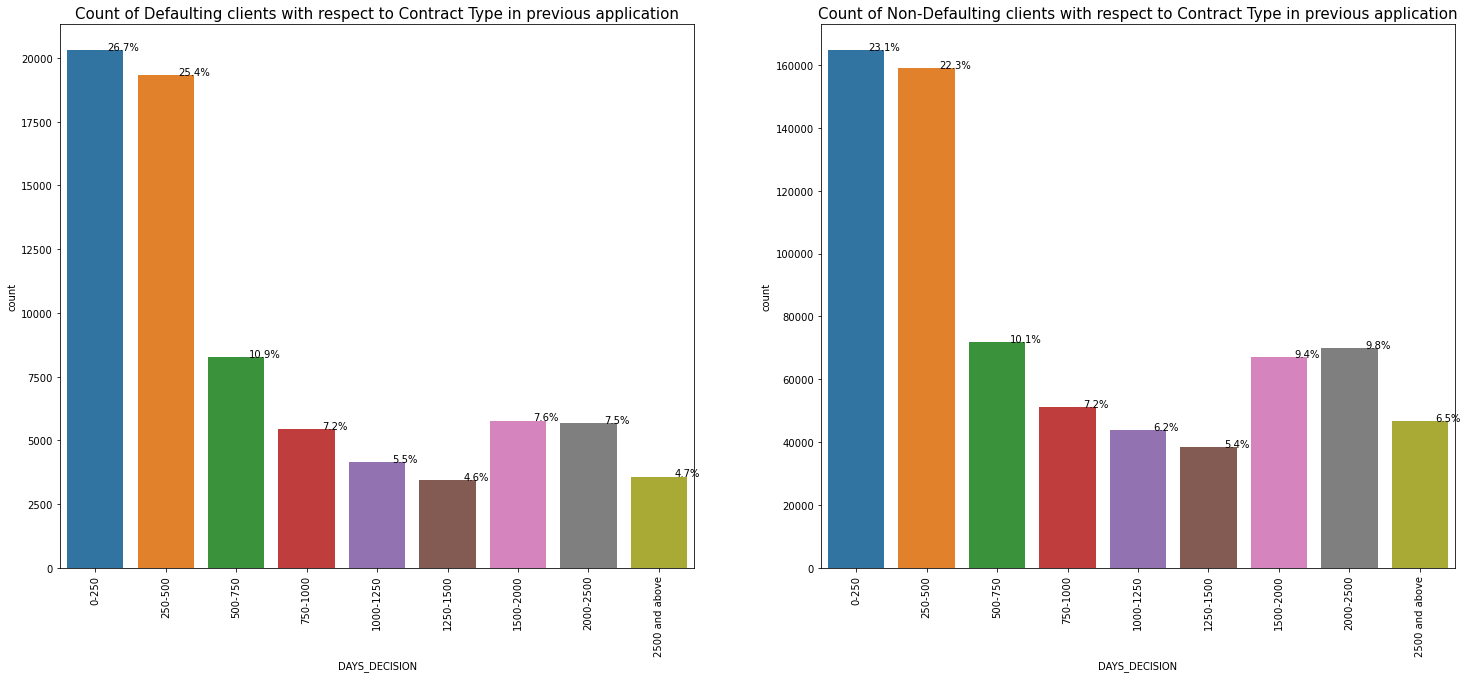

In [198]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
total = float(len(target_df1))
ax1 = sns.countplot(x="DAYS_DECISION", data=target_df1, order = target_df1.DAYS_DECISION.value_counts().index.categories)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
plt.title('Count of Defaulting clients with respect to Contract Type in previous application', fontsize=15)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
    

plt.subplot(1,2,2)
total = float(len(target_df0))
ax2 = sns.countplot(x="DAYS_DECISION", data=target_df0, order = target_df0.DAYS_DECISION.value_counts().index.categories)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)
plt.title('Count of Non-Defaulting clients with respect to Contract Type in previous application', fontsize=15)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

- From the above plots, it can be observed that if the decision of approving or rejecting client's previous application was take between 0 to 750 days before current application, then there is a chance that the client could default the loan
- If the decision of approving or rejecting the client's previous application was taken before 750 days of current application then the probability of that client defaulting the loan is less. This could be the case if the client has improved his/her financial status between these days then the chance of them defaulting the loan is less

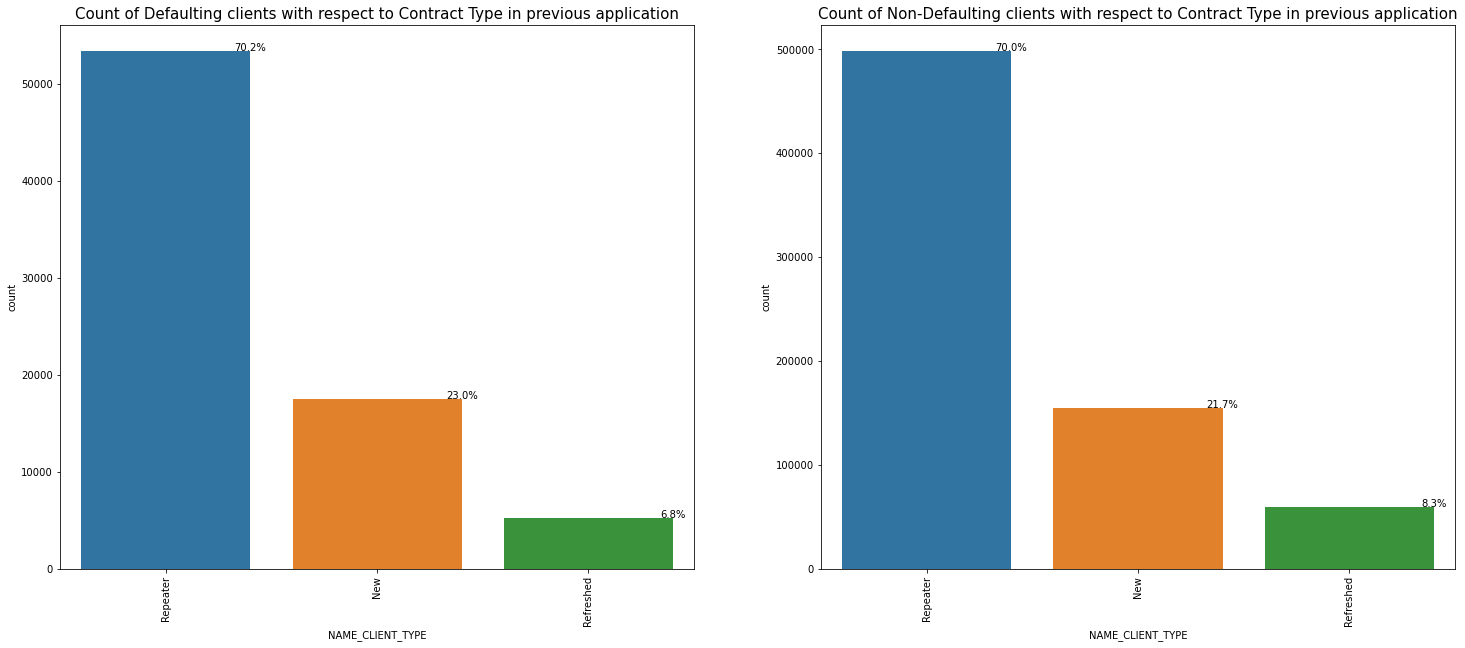

In [199]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
total = float(len(target_df1))
ax1 = sns.countplot(x="NAME_CLIENT_TYPE", data=target_df1, order = target_df1.NAME_CLIENT_TYPE.value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
plt.title('Count of Defaulting clients with respect to Contract Type in previous application', fontsize=15)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
    

plt.subplot(1,2,2)
total = float(len(target_df0))
ax2 = sns.countplot(x="NAME_CLIENT_TYPE", data=target_df0, order = target_df0.NAME_CLIENT_TYPE.value_counts().index)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)
plt.title('Count of Non-Defaulting clients with respect to Contract Type in previous application', fontsize=15)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

- It can be observed from the above plots that New clients have more probability of defaulting as compared to Repeater

# Bivariate Analysis

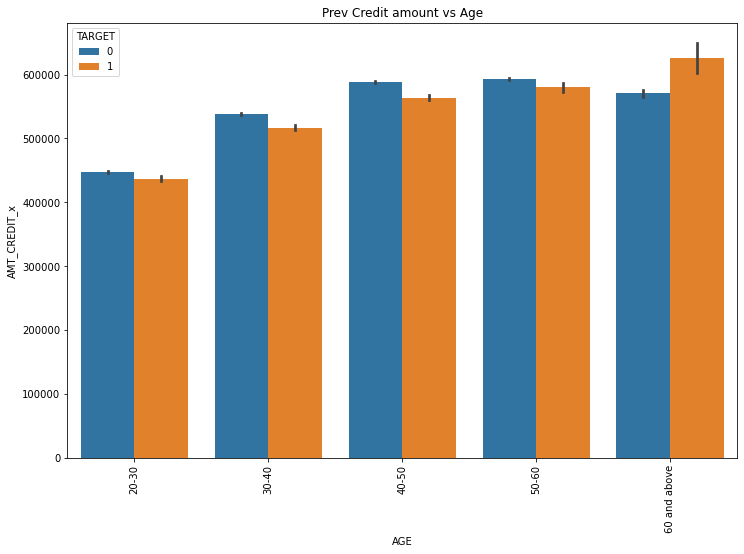

In [200]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.barplot(data =credit_dataset, y='AMT_CREDIT_x',hue='TARGET',x='AGE')
plt.title('Prev Credit amount vs Age')
plt.show()


- Here we can see that the clients with age above 60 have high credit amount for Target 1 i.e. for defaulting the loan and the clients who are younger than 60 have high credit values with Target 0 than Target 1.
- As per Univariate analysis it was observed that for ages 60 and above the percentage of clients defaulting the loan is less but according to above plot we can infer that banks should focus more on people younger than 60 to give loans

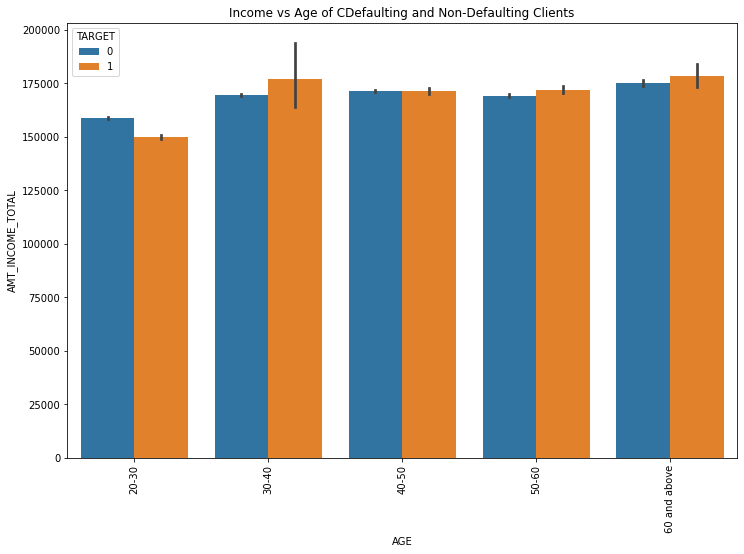

In [205]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.barplot(data =credit_dataset, y='AMT_INCOME_TOTAL',hue='TARGET',x='AGE')
plt.title('Income vs Age of CDefaulting and Non-Defaulting Clients')
plt.show()


- From the above plot it can be inferred that the income of Clients with Age between 30 and 40 who tend to default is more than those who didn't default
- In the age group 20-30 clients who have more income have less probability of defaulting

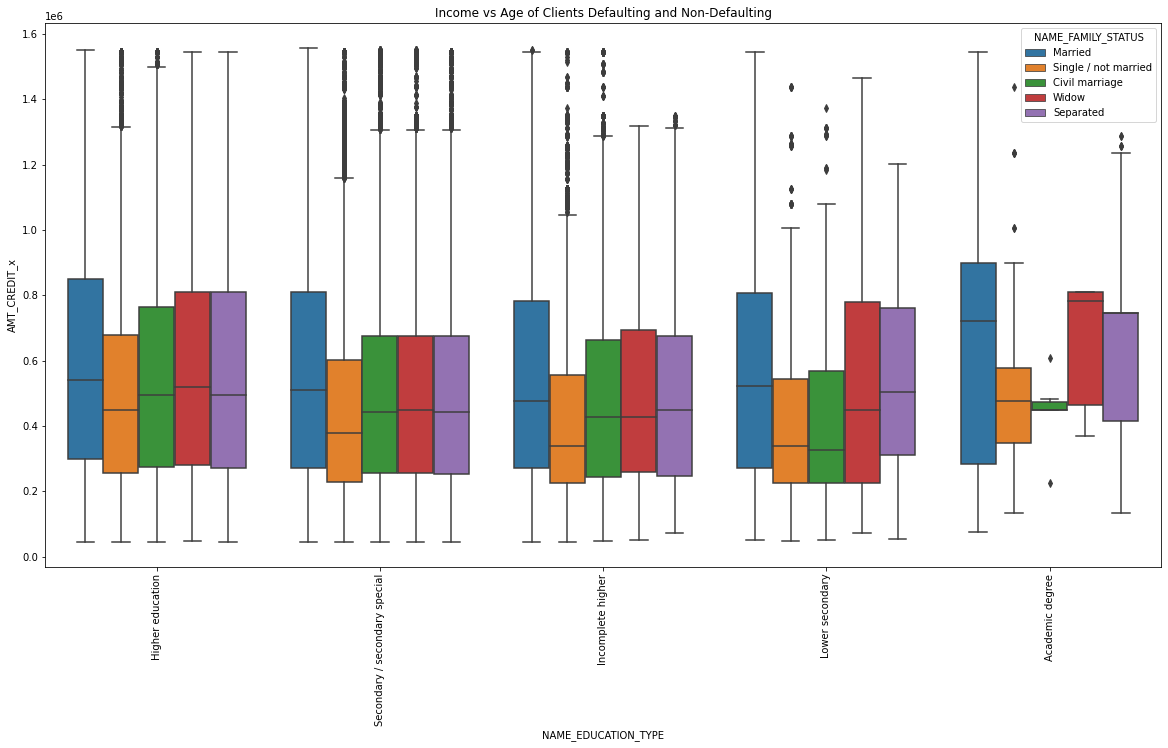

In [210]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.boxplot(data =target_df0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT_x', hue ='NAME_FAMILY_STATUS')
plt.title('Income vs Age of Clients Defaulting and Non-Defaulting')
plt.show()


- It can be observed that "Married" client take more credit as loan than any other family type
- Also the Credit of Seperated or Widow Clients is reasonably high for Lower Secondary, Higher Education and Academic degree.

Text(0.5, 1.0, 'Prev Credit amount vs Employed Years')

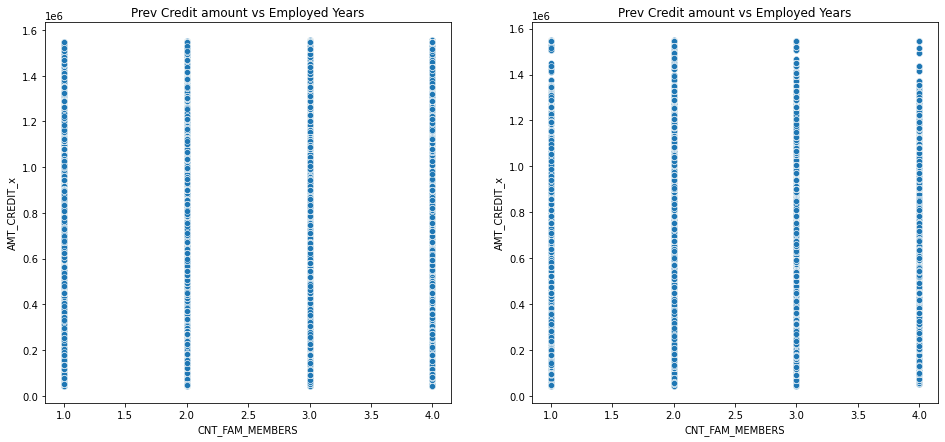

In [211]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.scatterplot(data =target_df0, y='AMT_CREDIT_x',x='CNT_FAM_MEMBERS')
plt.title('Prev Credit amount vs Employed Years')

plt.subplot(1,2,2)
sns.scatterplot(data =target_df1, y='AMT_CREDIT_x',x='CNT_FAM_MEMBERS')
plt.title('Prev Credit amount vs Employed Years')
plt.show()

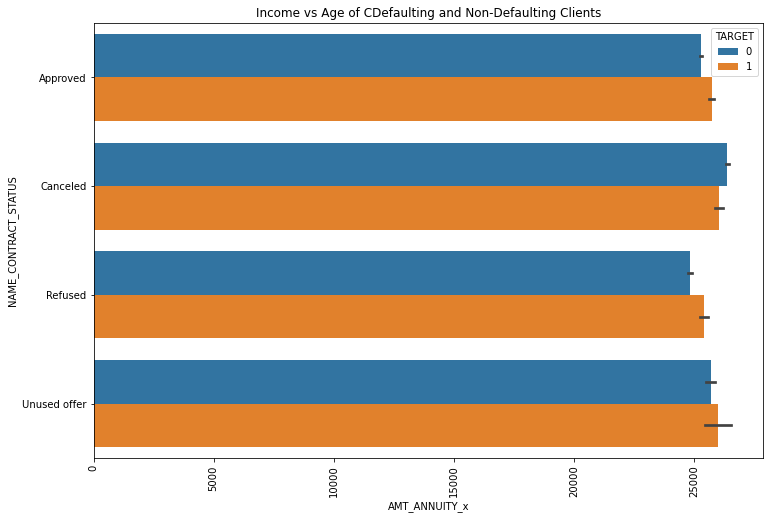

In [215]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.barplot(data =credit_dataset, y='NAME_CONTRACT_STATUS',hue='TARGET',x='AMT_ANNUITY_x')
plt.title('Income vs Age of CDefaulting and Non-Defaulting Clients')
plt.show()


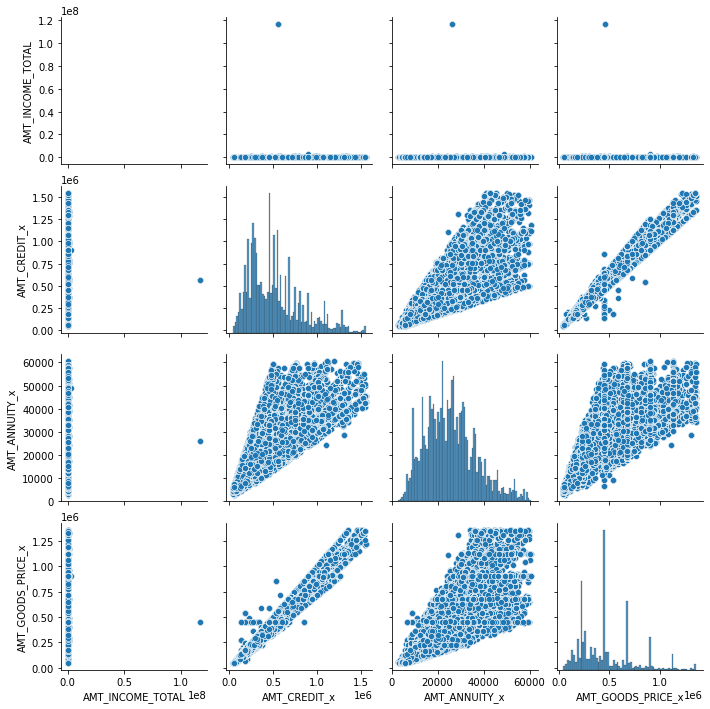

In [212]:
sns.pairplot(data=target_df1, vars=[ 'AMT_INCOME_TOTAL',
                                               'AMT_CREDIT_x',
                                               'AMT_ANNUITY_x',
                                               'AMT_GOODS_PRICE_x'])
plt.show()

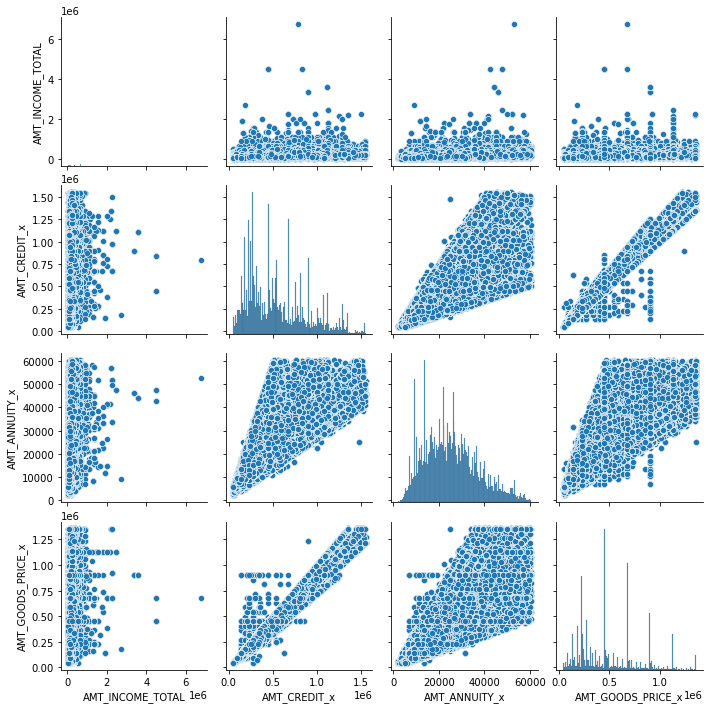

In [213]:
sns.pairplot(data=target_df0, vars=[ 'AMT_INCOME_TOTAL',
                                               'AMT_CREDIT_x',
                                               'AMT_ANNUITY_x',
                                               'AMT_GOODS_PRICE_x'])
plt.show()

- From the above 2 pair plots the following can be inferred :
    - There is a linear relationship between credit and annuity no matter if the client is defaulting or not defaulting
    - In the case where client is defaulting, even if the income is low, the credit amount is still increasing that means that clients with low incomes are asking for huge amount of loans which can result in them defaulting

## Correlation between numeric values

In [218]:
credit_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 788586 entries, 0 to 788585
Data columns (total 41 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   SK_ID_CURR            788586 non-null  int64   
 1   TARGET                788586 non-null  int64   
 2   NAME_CONTRACT_TYPE_x  788586 non-null  object  
 3   CODE_GENDER           788586 non-null  object  
 4   FLAG_OWN_CAR          788586 non-null  object  
 5   FLAG_OWN_REALTY       788586 non-null  object  
 6   CNT_CHILDREN          788586 non-null  int64   
 7   AMT_INCOME_TOTAL      788586 non-null  float64 
 8   AMT_CREDIT_x          788586 non-null  float64 
 9   AMT_ANNUITY_x         788586 non-null  float64 
 10  AMT_GOODS_PRICE_x     788586 non-null  float64 
 11  NAME_TYPE_SUITE       788586 non-null  object  
 12  NAME_INCOME_TYPE      788586 non-null  object  
 13  NAME_EDUCATION_TYPE   788586 non-null  object  
 14  NAME_FAMILY_STATUS    788586 non-nul

In [220]:
target0_corr=target_df0.iloc[0:,2:]
target1_corr=target_df1.iloc[0:,2:]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')

In [221]:
target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,EXT_SOURCE_2,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,SELLERPLACE_AREA,CNT_PAYMENT
CNT_CHILDREN,1.000000,-0.022279,-0.015361,-0.002323,-0.018543,-0.280549,-0.041077,0.843017,0.031641,-0.021902,-0.003078,-0.041316,0.012069,0.003530,-0.056585,0.055864,-0.024125
AMT_INCOME_TOTAL,-0.022279,1.000000,0.345897,0.418991,0.346986,0.039455,0.045915,-0.019317,-0.181402,0.142891,0.003362,0.114203,-0.028443,-0.031651,0.104080,-0.037883,0.012963
AMT_CREDIT_x,-0.015361,0.345897,1.000000,0.812889,0.982753,0.149764,0.089257,0.048457,-0.058515,0.103915,-0.000053,0.036030,-0.004490,0.002087,0.036273,0.022375,-0.009186
AMT_ANNUITY_x,-0.002323,0.418991,0.812889,1.000000,0.806623,0.067504,0.051911,0.058238,-0.083328,0.088928,0.000610,0.074771,-0.005094,-0.005548,0.057915,0.011993,-0.020414
AMT_GOODS_PRICE_x,-0.018543,0.346986,0.982753,0.806623,1.000000,0.148083,0.094032,0.048274,-0.060649,0.111633,-0.000297,0.035057,-0.000772,0.003941,0.033459,0.029429,-0.010614
DAYS_BIRTH,-0.280549,0.039455,0.149764,0.067504,0.148083,1.000000,0.296496,-0.199831,-0.036758,0.143382,0.002733,0.045855,-0.055403,-0.037993,0.068997,-0.092794,0.041031
DAYS_EMPLOYED,-0.041077,0.045915,0.089257,0.051911,0.094032,0.296496,1.000000,0.000327,0.013537,0.093777,-0.001375,0.008029,-0.004268,0.003543,0.009269,-0.006831,0.008577
CNT_FAM_MEMBERS,0.843017,-0.019317,0.048457,0.058238,0.048274,-0.199831,0.000327,1.000000,0.035086,-0.007493,-0.002706,-0.033214,0.000367,-0.005354,-0.041934,0.048988,-0.019112
REGION_RATING_CLIENT,0.031641,-0.181402,-0.058515,-0.083328,-0.060649,-0.036758,0.013537,0.035086,1.000000,-0.296278,0.000020,-0.040678,0.000658,0.000713,-0.030356,0.031181,0.005019
EXT_SOURCE_2,-0.021902,0.142891,0.103915,0.088928,0.111633,0.143382,0.093777,-0.007493,-0.296278,1.000000,-0.001192,0.031000,-0.000535,-0.000436,0.029321,-0.008540,-0.001326


In [222]:
target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,EXT_SOURCE_2,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,SELLERPLACE_AREA,CNT_PAYMENT
CNT_CHILDREN,1.000000,-0.033972,0.003748,0.021563,-0.002461,-0.200091,-0.009760,0.837653,0.039831,-0.009683,-0.001195,-0.025245,0.013165,0.008201,-0.038219,0.042253,-0.007871
AMT_INCOME_TOTAL,-0.033972,1.000000,0.315547,0.379933,0.319257,0.098832,0.036999,-0.028642,-0.155900,0.135447,0.004211,0.099228,-0.030368,-0.030789,0.087203,-0.036065,0.010939
AMT_CREDIT_x,0.003748,0.315547,1.000000,0.803953,0.973562,0.174715,0.092737,0.067305,-0.045060,0.089773,0.001223,0.016080,0.005611,0.012582,0.014056,0.033376,-0.012235
AMT_ANNUITY_x,0.021563,0.379933,0.803953,1.000000,0.795553,0.071091,0.049083,0.073989,-0.050981,0.080237,0.003928,0.050510,0.005428,0.003176,0.033840,0.028617,-0.017846
AMT_GOODS_PRICE_x,-0.002461,0.319257,0.973562,0.795553,1.000000,0.167861,0.103800,0.065548,-0.054182,0.102015,0.001013,0.017244,0.010521,0.016486,0.013751,0.040142,-0.011697
DAYS_BIRTH,-0.200091,0.098832,0.174715,0.071091,0.167861,1.000000,0.249257,-0.114473,-0.055088,0.148228,-0.005944,0.047258,-0.078496,-0.059257,0.074267,-0.130111,0.043047
DAYS_EMPLOYED,-0.009760,0.036999,0.092737,0.049083,0.103800,0.249257,1.000000,0.037934,-0.000923,0.098517,-0.001720,0.015758,-0.016115,-0.004855,0.019238,-0.028557,0.022956
CNT_FAM_MEMBERS,0.837653,-0.028642,0.067305,0.073989,0.065548,-0.114473,0.037934,1.000000,0.038035,-0.001798,0.000557,-0.014374,-0.001341,-0.001858,-0.017681,0.027923,-0.003977
REGION_RATING_CLIENT,0.039831,-0.155900,-0.045060,-0.050981,-0.054182,-0.055088,-0.000923,0.038035,1.000000,-0.240615,-0.000978,-0.016362,-0.008212,-0.004468,-0.004457,0.021592,0.010465
EXT_SOURCE_2,-0.009683,0.135447,0.089773,0.080237,0.102015,0.148228,0.098517,-0.001798,-0.240615,1.000000,0.000550,0.024615,-0.008752,-0.007576,0.017703,-0.018489,0.004697


<AxesSubplot:>

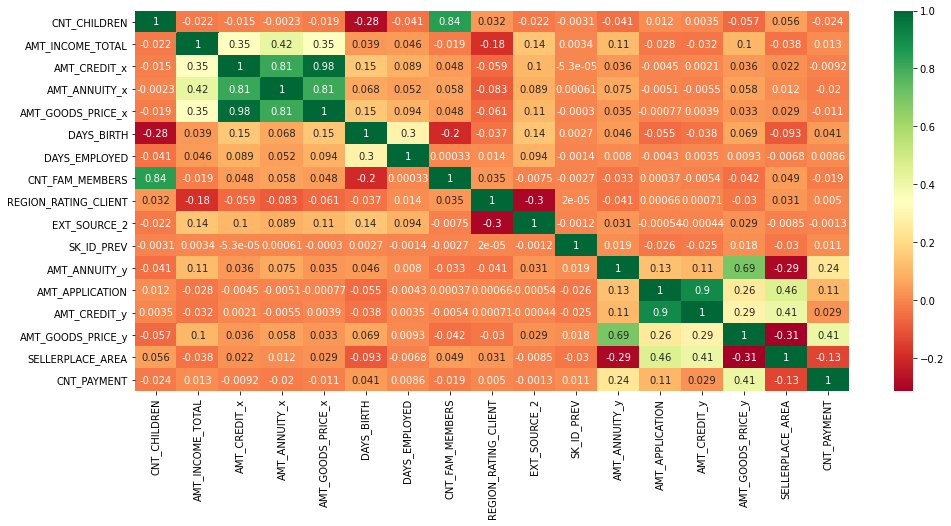

In [230]:
plt.figure(figsize=(16,7))
sns.heatmap(target0,cmap = "RdYlGn",annot = True)
plt.show()

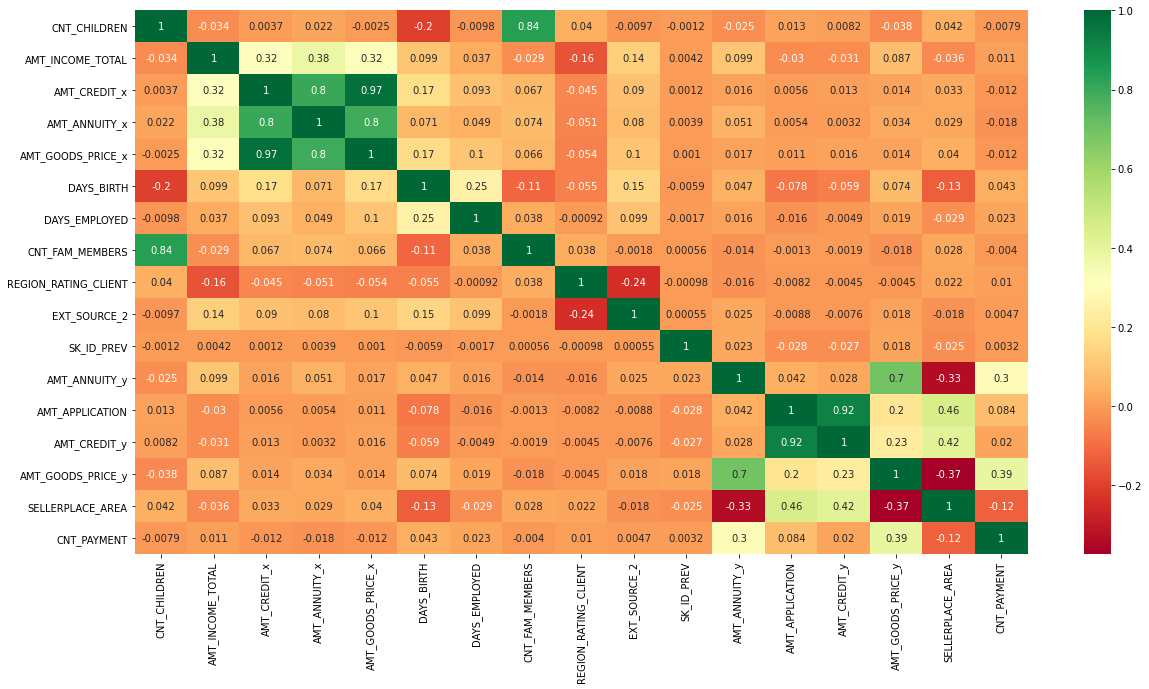

In [233]:
plt.figure(figsize=(20,10))
sns.heatmap(target1,cmap = "RdYlGn",annot = True)
plt.show()

- From the above two heat maps we can infer that:
    - Region Rating Client is inversely propotional to AMT_GOODS_PRICE, AMT_ANNUITY and AMT_CREDIT which means that if the rating of region where client lives is less then the client asks for more credit amount for loan.
    - Days of Birth is inversely propotional to application amount and also the credit amount of previous application
    - There seems to be a fairly good correlation between AMT_APPLICATION AND SELLERPLACE_AREA.

## Recommendations

- These following points could be considered before approving the loan of a client to make sure that the client doesn't default their loans :
    - It has been observed in the analysis that Males tend to default loans more than females so the focus should be on giving more loans to female clients
    - Clients owning a car or a house should have more priority in getting their loans approved as the chances of them defaulting is less
    - The clients who doesn't have children or have less members in the family tend to default less than those who have more children or more family members.
    - Clients who have income between 50,000 to 2,00,000 tend to default more so the focus should be on clients with income more than 2,00,000
    - Clients who take credit amount between 2,00,000 and 7,00,000 tend to default more and it has been observed that clients who take loan of more than 9,00,000 have less probability of defaulting
    - It has been observed that banks mostly focus on working class clients but it has been observed that they default more than other clients. So it is recommended to focus on commercial associates or state servants to give out loans
    - People with age 20-40 tend to default more and people in the age group of 40 above have less probability of defaulting so the focus should be on clients who are older than 40
    - Clients with work experience less than 5 years have high probability of defaulting the loan so it is recommended to prioritize clients with more than 5 years experience